In [2]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [3]:
with open('./results/nopricechange/2-4/traderIDs_501_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [4]:
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_501_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_501_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/2-4/totalOrders_501_5000_100_2_5.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,2,993,pcaot,6,1.0
1,0,993,vpneq,10,2.0
2,3,993,vpneq,13,-1.0
3,2,993,jzndk,14,1.0
4,1,993,jwivu,13,-2.0
...,...,...,...,...,...
2139960,2,5992,khrsl,62,4.0
2139961,0,5992,sujzt,75,-6.0
2139962,1,5992,sujzt,62,4.0
2139963,0,5992,gdnqf,75,-91.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [5]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [6]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades11_npc_501_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  995303
Cascade length:  911
New Orders left:  994392
making new cascade


OG Orders left:  994392
Cascade length:  823
New Orders left:  993569
making new cascade


OG Orders left:  993569
Cascade length:  1059
New Orders left:  992510
making new cascade


OG Orders left:  992510
Cascade length:  543
New Orders left:  991967
making new cascade


OG Orders left:  991967
Cascade length:  648
New Orders left:  991319
making new cascade


OG Orders left:  991319
Cascade length:  705
New Orders left:  990614
making new cascade


OG Orders left:  990614
Cascade length:  1
New Orders left:  990613
making new cascade


OG Orders left:  990613
Cascade length:  942
New Orders left:  989671
making new cascade


OG Orders left:  989671
Cascade length:  273
New Orders left:  989398
making new cascade


OG Orders left:  989398
Cascade length:  1
New Orders left:  989397
making new cascade


OG Orders left:  989397
Cascade length:  938
New Orders left:  988459
making new cascade


OG

Cascade length:  1
New Orders left:  964583
making new cascade


OG Orders left:  964583
Cascade length:  11
New Orders left:  964572
making new cascade


OG Orders left:  964572
Cascade length:  346
New Orders left:  964226
making new cascade


OG Orders left:  964226
Cascade length:  542
New Orders left:  963684
making new cascade


OG Orders left:  963684
Cascade length:  235
New Orders left:  963449
making new cascade


OG Orders left:  963449
Cascade length:  847
New Orders left:  962602
making new cascade


OG Orders left:  962602
Cascade length:  1
New Orders left:  962601
making new cascade


OG Orders left:  962601
Cascade length:  451
New Orders left:  962150
making new cascade


OG Orders left:  962150
Cascade length:  332
New Orders left:  961818
making new cascade


OG Orders left:  961818
Cascade length:  2
New Orders left:  961816
making new cascade


OG Orders left:  961816
Cascade length:  2
New Orders left:  961814
making new cascade


OG Orders left:  961814
Cascade 

Cascade length:  138
New Orders left:  945372
making new cascade


OG Orders left:  945372
Cascade length:  32
New Orders left:  945340
making new cascade


OG Orders left:  945340
Cascade length:  64
New Orders left:  945276
making new cascade


OG Orders left:  945276
Cascade length:  546
New Orders left:  944730
making new cascade


OG Orders left:  944730
Cascade length:  260
New Orders left:  944470
making new cascade


OG Orders left:  944470
Cascade length:  2
New Orders left:  944468
making new cascade


OG Orders left:  944468
Cascade length:  3
New Orders left:  944465
making new cascade


OG Orders left:  944465
Cascade length:  3
New Orders left:  944462
making new cascade


OG Orders left:  944462
Cascade length:  243
New Orders left:  944219
making new cascade


OG Orders left:  944219
Cascade length:  4
New Orders left:  944215
making new cascade


OG Orders left:  944215
Cascade length:  151
New Orders left:  944064
making new cascade


OG Orders left:  944064
Cascade l

Cascade length:  29
New Orders left:  931469
making new cascade


OG Orders left:  931469
Cascade length:  17
New Orders left:  931452
making new cascade


OG Orders left:  931452
Cascade length:  23
New Orders left:  931429
making new cascade


OG Orders left:  931429
Cascade length:  4
New Orders left:  931425
making new cascade


OG Orders left:  931425
Cascade length:  7
New Orders left:  931418
making new cascade


OG Orders left:  931418
Cascade length:  242
New Orders left:  931176
making new cascade


OG Orders left:  931176
Cascade length:  1
New Orders left:  931175
making new cascade


OG Orders left:  931175
Cascade length:  54
New Orders left:  931121
making new cascade


OG Orders left:  931121
Cascade length:  132
New Orders left:  930989
making new cascade


OG Orders left:  930989
Cascade length:  2
New Orders left:  930987
making new cascade


OG Orders left:  930987
Cascade length:  432
New Orders left:  930555
making new cascade


OG Orders left:  930555
Cascade len

Cascade length:  6
New Orders left:  923764
making new cascade


OG Orders left:  923764
Cascade length:  51
New Orders left:  923713
making new cascade


OG Orders left:  923713
Cascade length:  55
New Orders left:  923658
making new cascade


OG Orders left:  923658
Cascade length:  1
New Orders left:  923657
making new cascade


OG Orders left:  923657
Cascade length:  1
New Orders left:  923656
making new cascade


OG Orders left:  923656
Cascade length:  266
New Orders left:  923390
making new cascade


OG Orders left:  923390
Cascade length:  1
New Orders left:  923389
making new cascade


OG Orders left:  923389
Cascade length:  66
New Orders left:  923323
making new cascade


OG Orders left:  923323
Cascade length:  41
New Orders left:  923282
making new cascade


OG Orders left:  923282
Cascade length:  7
New Orders left:  923275
making new cascade


OG Orders left:  923275
Cascade length:  2
New Orders left:  923273
making new cascade


OG Orders left:  923273
Cascade length:

Cascade length:  22
New Orders left:  911802
making new cascade


OG Orders left:  911802
Cascade length:  63
New Orders left:  911739
making new cascade


OG Orders left:  911739
Cascade length:  1
New Orders left:  911738
making new cascade


OG Orders left:  911738
Cascade length:  1
New Orders left:  911737
making new cascade


OG Orders left:  911737
Cascade length:  541
New Orders left:  911196
making new cascade


OG Orders left:  911196
Cascade length:  541
New Orders left:  910655
making new cascade


OG Orders left:  910655
Cascade length:  4
New Orders left:  910651
making new cascade


OG Orders left:  910651
Cascade length:  114
New Orders left:  910537
making new cascade


OG Orders left:  910537
Cascade length:  66
New Orders left:  910471
making new cascade


OG Orders left:  910471
Cascade length:  3
New Orders left:  910468
making new cascade


OG Orders left:  910468
Cascade length:  53
New Orders left:  910415
making new cascade


OG Orders left:  910415
Cascade len

Cascade length:  5
New Orders left:  903247
making new cascade


OG Orders left:  903247
Cascade length:  2
New Orders left:  903245
making new cascade


OG Orders left:  903245
Cascade length:  12
New Orders left:  903233
making new cascade


OG Orders left:  903233
Cascade length:  3
New Orders left:  903230
making new cascade


OG Orders left:  903230
Cascade length:  387
New Orders left:  902843
making new cascade


OG Orders left:  902843
Cascade length:  85
New Orders left:  902758
making new cascade


OG Orders left:  902758
Cascade length:  493
New Orders left:  902265
making new cascade


OG Orders left:  902265
Cascade length:  25
New Orders left:  902240
making new cascade


OG Orders left:  902240
Cascade length:  30
New Orders left:  902210
making new cascade


OG Orders left:  902210
Cascade length:  62
New Orders left:  902148
making new cascade


OG Orders left:  902148
Cascade length:  40
New Orders left:  902108
making new cascade


OG Orders left:  902108
Cascade len

Cascade length:  45
New Orders left:  893658
making new cascade


OG Orders left:  893658
Cascade length:  88
New Orders left:  893570
making new cascade


OG Orders left:  893570
Cascade length:  64
New Orders left:  893506
making new cascade


OG Orders left:  893506
Cascade length:  7
New Orders left:  893499
making new cascade


OG Orders left:  893499
Cascade length:  28
New Orders left:  893471
making new cascade


OG Orders left:  893471
Cascade length:  459
New Orders left:  893012
making new cascade


OG Orders left:  893012
Cascade length:  1
New Orders left:  893011
making new cascade


OG Orders left:  893011
Cascade length:  1
New Orders left:  893010
making new cascade


OG Orders left:  893010
Cascade length:  74
New Orders left:  892936
making new cascade


OG Orders left:  892936
Cascade length:  362
New Orders left:  892574
making new cascade


OG Orders left:  892574
Cascade length:  23
New Orders left:  892551
making new cascade


OG Orders left:  892551
Cascade len

Cascade length:  26
New Orders left:  886126
making new cascade


OG Orders left:  886126
Cascade length:  17
New Orders left:  886109
making new cascade


OG Orders left:  886109
Cascade length:  32
New Orders left:  886077
making new cascade


OG Orders left:  886077
Cascade length:  2
New Orders left:  886075
making new cascade


OG Orders left:  886075
Cascade length:  3
New Orders left:  886072
making new cascade


OG Orders left:  886072
Cascade length:  314
New Orders left:  885758
making new cascade


OG Orders left:  885758
Cascade length:  23
New Orders left:  885735
making new cascade


OG Orders left:  885735
Cascade length:  1
New Orders left:  885734
making new cascade


OG Orders left:  885734
Cascade length:  10
New Orders left:  885724
making new cascade


OG Orders left:  885724
Cascade length:  1
New Orders left:  885723
making new cascade


OG Orders left:  885723
Cascade length:  60
New Orders left:  885663
making new cascade


OG Orders left:  885663
Cascade lengt

Cascade length:  22
New Orders left:  879772
making new cascade


OG Orders left:  879772
Cascade length:  187
New Orders left:  879585
making new cascade


OG Orders left:  879585
Cascade length:  25
New Orders left:  879560
making new cascade


OG Orders left:  879560
Cascade length:  42
New Orders left:  879518
making new cascade


OG Orders left:  879518
Cascade length:  47
New Orders left:  879471
making new cascade


OG Orders left:  879471
Cascade length:  2
New Orders left:  879469
making new cascade


OG Orders left:  879469
Cascade length:  19
New Orders left:  879450
making new cascade


OG Orders left:  879450
Cascade length:  35
New Orders left:  879415
making new cascade


OG Orders left:  879415
Cascade length:  142
New Orders left:  879273
making new cascade


OG Orders left:  879273
Cascade length:  2
New Orders left:  879271
making new cascade


OG Orders left:  879271
Cascade length:  149
New Orders left:  879122
making new cascade


OG Orders left:  879122
Cascade l

Cascade length:  12
New Orders left:  872167
making new cascade


OG Orders left:  872167
Cascade length:  1
New Orders left:  872166
making new cascade


OG Orders left:  872166
Cascade length:  70
New Orders left:  872096
making new cascade


OG Orders left:  872096
Cascade length:  59
New Orders left:  872037
making new cascade


OG Orders left:  872037
Cascade length:  127
New Orders left:  871910
making new cascade


OG Orders left:  871910
Cascade length:  16
New Orders left:  871894
making new cascade


OG Orders left:  871894
Cascade length:  135
New Orders left:  871759
making new cascade


OG Orders left:  871759
Cascade length:  2
New Orders left:  871757
making new cascade


OG Orders left:  871757
Cascade length:  19
New Orders left:  871738
making new cascade


OG Orders left:  871738
Cascade length:  17
New Orders left:  871721
making new cascade


OG Orders left:  871721
Cascade length:  104
New Orders left:  871617
making new cascade


OG Orders left:  871617
Cascade l

Cascade length:  152
New Orders left:  868309
making new cascade


OG Orders left:  868309
Cascade length:  13
New Orders left:  868296
making new cascade


OG Orders left:  868296
Cascade length:  182
New Orders left:  868114
making new cascade


OG Orders left:  868114
Cascade length:  4
New Orders left:  868110
making new cascade


OG Orders left:  868110
Cascade length:  2
New Orders left:  868108
making new cascade


OG Orders left:  868108
Cascade length:  4
New Orders left:  868104
making new cascade


OG Orders left:  868104
Cascade length:  1
New Orders left:  868103
making new cascade


OG Orders left:  868103
Cascade length:  16
New Orders left:  868087
making new cascade


OG Orders left:  868087
Cascade length:  42
New Orders left:  868045
making new cascade


OG Orders left:  868045
Cascade length:  18
New Orders left:  868027
making new cascade


OG Orders left:  868027
Cascade length:  25
New Orders left:  868002
making new cascade


OG Orders left:  868002
Cascade leng

Cascade length:  133
New Orders left:  863869
making new cascade


OG Orders left:  863869
Cascade length:  273
New Orders left:  863596
making new cascade


OG Orders left:  863596
Cascade length:  8
New Orders left:  863588
making new cascade


OG Orders left:  863588
Cascade length:  118
New Orders left:  863470
making new cascade


OG Orders left:  863470
Cascade length:  3
New Orders left:  863467
making new cascade


OG Orders left:  863467
Cascade length:  36
New Orders left:  863431
making new cascade


OG Orders left:  863431
Cascade length:  150
New Orders left:  863281
making new cascade


OG Orders left:  863281
Cascade length:  1
New Orders left:  863280
making new cascade


OG Orders left:  863280
Cascade length:  9
New Orders left:  863271
making new cascade


OG Orders left:  863271
Cascade length:  369
New Orders left:  862902
making new cascade


OG Orders left:  862902
Cascade length:  200
New Orders left:  862702
making new cascade


OG Orders left:  862702
Cascade 

Cascade length:  2
New Orders left:  856532
making new cascade


OG Orders left:  856532
Cascade length:  2
New Orders left:  856530
making new cascade


OG Orders left:  856530
Cascade length:  2
New Orders left:  856528
making new cascade


OG Orders left:  856528
Cascade length:  7
New Orders left:  856521
making new cascade


OG Orders left:  856521
Cascade length:  8
New Orders left:  856513
making new cascade


OG Orders left:  856513
Cascade length:  72
New Orders left:  856441
making new cascade


OG Orders left:  856441
Cascade length:  121
New Orders left:  856320
making new cascade


OG Orders left:  856320
Cascade length:  132
New Orders left:  856188
making new cascade


OG Orders left:  856188
Cascade length:  5
New Orders left:  856183
making new cascade


OG Orders left:  856183
Cascade length:  119
New Orders left:  856064
making new cascade


OG Orders left:  856064
Cascade length:  4
New Orders left:  856060
making new cascade


OG Orders left:  856060
Cascade length

Cascade length:  4
New Orders left:  848609
making new cascade


OG Orders left:  848609
Cascade length:  2
New Orders left:  848607
making new cascade


OG Orders left:  848607
Cascade length:  8
New Orders left:  848599
making new cascade


OG Orders left:  848599
Cascade length:  3
New Orders left:  848596
making new cascade


OG Orders left:  848596
Cascade length:  18
New Orders left:  848578
making new cascade


OG Orders left:  848578
Cascade length:  115
New Orders left:  848463
making new cascade


OG Orders left:  848463
Cascade length:  1
New Orders left:  848462
making new cascade


OG Orders left:  848462
Cascade length:  15
New Orders left:  848447
making new cascade


OG Orders left:  848447
Cascade length:  23
New Orders left:  848424
making new cascade


OG Orders left:  848424
Cascade length:  67
New Orders left:  848357
making new cascade


OG Orders left:  848357
Cascade length:  60
New Orders left:  848297
making new cascade


OG Orders left:  848297
Cascade length

Cascade length:  53
New Orders left:  842872
making new cascade


OG Orders left:  842872
Cascade length:  3
New Orders left:  842869
making new cascade


OG Orders left:  842869
Cascade length:  1
New Orders left:  842868
making new cascade


OG Orders left:  842868
Cascade length:  6
New Orders left:  842862
making new cascade


OG Orders left:  842862
Cascade length:  136
New Orders left:  842726
making new cascade


OG Orders left:  842726
Cascade length:  2
New Orders left:  842724
making new cascade


OG Orders left:  842724
Cascade length:  7
New Orders left:  842717
making new cascade


OG Orders left:  842717
Cascade length:  18
New Orders left:  842699
making new cascade


OG Orders left:  842699
Cascade length:  104
New Orders left:  842595
making new cascade


OG Orders left:  842595
Cascade length:  46
New Orders left:  842549
making new cascade


OG Orders left:  842549
Cascade length:  102
New Orders left:  842447
making new cascade


OG Orders left:  842447
Cascade leng

Cascade length:  21
New Orders left:  837644
making new cascade


OG Orders left:  837644
Cascade length:  7
New Orders left:  837637
making new cascade


OG Orders left:  837637
Cascade length:  34
New Orders left:  837603
making new cascade


OG Orders left:  837603
Cascade length:  1
New Orders left:  837602
making new cascade


OG Orders left:  837602
Cascade length:  87
New Orders left:  837515
making new cascade


OG Orders left:  837515
Cascade length:  8
New Orders left:  837507
making new cascade


OG Orders left:  837507
Cascade length:  6
New Orders left:  837501
making new cascade


OG Orders left:  837501
Cascade length:  68
New Orders left:  837433
making new cascade


OG Orders left:  837433
Cascade length:  123
New Orders left:  837310
making new cascade


OG Orders left:  837310
Cascade length:  4
New Orders left:  837306
making new cascade


OG Orders left:  837306
Cascade length:  2
New Orders left:  837304
making new cascade


OG Orders left:  837304
Cascade length:

Cascade length:  23
New Orders left:  833196
making new cascade


OG Orders left:  833196
Cascade length:  2
New Orders left:  833194
making new cascade


OG Orders left:  833194
Cascade length:  170
New Orders left:  833024
making new cascade


OG Orders left:  833024
Cascade length:  16
New Orders left:  833008
making new cascade


OG Orders left:  833008
Cascade length:  228
New Orders left:  832780
making new cascade


OG Orders left:  832780
Cascade length:  122
New Orders left:  832658
making new cascade


OG Orders left:  832658
Cascade length:  25
New Orders left:  832633
making new cascade


OG Orders left:  832633
Cascade length:  4
New Orders left:  832629
making new cascade


OG Orders left:  832629
Cascade length:  86
New Orders left:  832543
making new cascade


OG Orders left:  832543
Cascade length:  7
New Orders left:  832536
making new cascade


OG Orders left:  832536
Cascade length:  104
New Orders left:  832432
making new cascade


OG Orders left:  832432
Cascade l

Cascade length:  1
New Orders left:  828427
making new cascade


OG Orders left:  828427
Cascade length:  53
New Orders left:  828374
making new cascade


OG Orders left:  828374
Cascade length:  13
New Orders left:  828361
making new cascade


OG Orders left:  828361
Cascade length:  157
New Orders left:  828204
making new cascade


OG Orders left:  828204
Cascade length:  40
New Orders left:  828164
making new cascade


OG Orders left:  828164
Cascade length:  1
New Orders left:  828163
making new cascade


OG Orders left:  828163
Cascade length:  7
New Orders left:  828156
making new cascade


OG Orders left:  828156
Cascade length:  1
New Orders left:  828155
making new cascade


OG Orders left:  828155
Cascade length:  62
New Orders left:  828093
making new cascade


OG Orders left:  828093
Cascade length:  8
New Orders left:  828085
making new cascade


OG Orders left:  828085
Cascade length:  10
New Orders left:  828075
making new cascade


OG Orders left:  828075
Cascade length

Cascade length:  6
New Orders left:  824293
making new cascade


OG Orders left:  824293
Cascade length:  1
New Orders left:  824292
making new cascade


OG Orders left:  824292
Cascade length:  43
New Orders left:  824249
making new cascade


OG Orders left:  824249
Cascade length:  33
New Orders left:  824216
making new cascade


OG Orders left:  824216
Cascade length:  36
New Orders left:  824180
making new cascade


OG Orders left:  824180
Cascade length:  2
New Orders left:  824178
making new cascade


OG Orders left:  824178
Cascade length:  40
New Orders left:  824138
making new cascade


OG Orders left:  824138
Cascade length:  13
New Orders left:  824125
making new cascade


OG Orders left:  824125
Cascade length:  6
New Orders left:  824119
making new cascade


OG Orders left:  824119
Cascade length:  7
New Orders left:  824112
making new cascade


OG Orders left:  824112
Cascade length:  96
New Orders left:  824016
making new cascade


OG Orders left:  824016
Cascade length:

Cascade length:  206
New Orders left:  818454
making new cascade


OG Orders left:  818454
Cascade length:  2
New Orders left:  818452
making new cascade


OG Orders left:  818452
Cascade length:  12
New Orders left:  818440
making new cascade


OG Orders left:  818440
Cascade length:  57
New Orders left:  818383
making new cascade


OG Orders left:  818383
Cascade length:  67
New Orders left:  818316
making new cascade


OG Orders left:  818316
Cascade length:  29
New Orders left:  818287
making new cascade


OG Orders left:  818287
Cascade length:  1
New Orders left:  818286
making new cascade


OG Orders left:  818286
Cascade length:  2
New Orders left:  818284
making new cascade


OG Orders left:  818284
Cascade length:  341
New Orders left:  817943
making new cascade


OG Orders left:  817943
Cascade length:  6
New Orders left:  817937
making new cascade


OG Orders left:  817937
Cascade length:  2
New Orders left:  817935
making new cascade


OG Orders left:  817935
Cascade lengt

Cascade length:  2
New Orders left:  814217
making new cascade


OG Orders left:  814217
Cascade length:  12
New Orders left:  814205
making new cascade


OG Orders left:  814205
Cascade length:  26
New Orders left:  814179
making new cascade


OG Orders left:  814179
Cascade length:  136
New Orders left:  814043
making new cascade


OG Orders left:  814043
Cascade length:  2
New Orders left:  814041
making new cascade


OG Orders left:  814041
Cascade length:  19
New Orders left:  814022
making new cascade


OG Orders left:  814022
Cascade length:  67
New Orders left:  813955
making new cascade


OG Orders left:  813955
Cascade length:  243
New Orders left:  813712
making new cascade


OG Orders left:  813712
Cascade length:  2
New Orders left:  813710
making new cascade


OG Orders left:  813710
Cascade length:  4
New Orders left:  813706
making new cascade


OG Orders left:  813706
Cascade length:  40
New Orders left:  813666
making new cascade


OG Orders left:  813666
Cascade leng

Cascade length:  170
New Orders left:  809038
making new cascade


OG Orders left:  809038
Cascade length:  16
New Orders left:  809022
making new cascade


OG Orders left:  809022
Cascade length:  7
New Orders left:  809015
making new cascade


OG Orders left:  809015
Cascade length:  140
New Orders left:  808875
making new cascade


OG Orders left:  808875
Cascade length:  2
New Orders left:  808873
making new cascade


OG Orders left:  808873
Cascade length:  3
New Orders left:  808870
making new cascade


OG Orders left:  808870
Cascade length:  1
New Orders left:  808869
making new cascade


OG Orders left:  808869
Cascade length:  48
New Orders left:  808821
making new cascade


OG Orders left:  808821
Cascade length:  190
New Orders left:  808631
making new cascade


OG Orders left:  808631
Cascade length:  123
New Orders left:  808508
making new cascade


OG Orders left:  808508
Cascade length:  14
New Orders left:  808494
making new cascade


OG Orders left:  808494
Cascade le

Cascade length:  1
New Orders left:  803168
making new cascade


OG Orders left:  803168
Cascade length:  3
New Orders left:  803165
making new cascade


OG Orders left:  803165
Cascade length:  43
New Orders left:  803122
making new cascade


OG Orders left:  803122
Cascade length:  28
New Orders left:  803094
making new cascade


OG Orders left:  803094
Cascade length:  241
New Orders left:  802853
making new cascade


OG Orders left:  802853
Cascade length:  462
New Orders left:  802391
making new cascade


OG Orders left:  802391
Cascade length:  3
New Orders left:  802388
making new cascade


OG Orders left:  802388
Cascade length:  16
New Orders left:  802372
making new cascade


OG Orders left:  802372
Cascade length:  8
New Orders left:  802364
making new cascade


OG Orders left:  802364
Cascade length:  259
New Orders left:  802105
making new cascade


OG Orders left:  802105
Cascade length:  76
New Orders left:  802029
making new cascade


OG Orders left:  802029
Cascade len

Cascade length:  37
New Orders left:  795269
making new cascade


OG Orders left:  795269
Cascade length:  1
New Orders left:  795268
making new cascade


OG Orders left:  795268
Cascade length:  14
New Orders left:  795254
making new cascade


OG Orders left:  795254
Cascade length:  4
New Orders left:  795250
making new cascade


OG Orders left:  795250
Cascade length:  19
New Orders left:  795231
making new cascade


OG Orders left:  795231
Cascade length:  4
New Orders left:  795227
making new cascade


OG Orders left:  795227
Cascade length:  126
New Orders left:  795101
making new cascade


OG Orders left:  795101
Cascade length:  20
New Orders left:  795081
making new cascade


OG Orders left:  795081
Cascade length:  162
New Orders left:  794919
making new cascade


OG Orders left:  794919
Cascade length:  22
New Orders left:  794897
making new cascade


OG Orders left:  794897
Cascade length:  2
New Orders left:  794895
making new cascade


OG Orders left:  794895
Cascade leng

Cascade length:  20
New Orders left:  789647
making new cascade


OG Orders left:  789647
Cascade length:  111
New Orders left:  789536
making new cascade


OG Orders left:  789536
Cascade length:  1
New Orders left:  789535
making new cascade


OG Orders left:  789535
Cascade length:  9
New Orders left:  789526
making new cascade


OG Orders left:  789526
Cascade length:  87
New Orders left:  789439
making new cascade


OG Orders left:  789439
Cascade length:  72
New Orders left:  789367
making new cascade


OG Orders left:  789367
Cascade length:  352
New Orders left:  789015
making new cascade


OG Orders left:  789015
Cascade length:  1
New Orders left:  789014
making new cascade


OG Orders left:  789014
Cascade length:  4
New Orders left:  789010
making new cascade


OG Orders left:  789010
Cascade length:  180
New Orders left:  788830
making new cascade


OG Orders left:  788830
Cascade length:  1
New Orders left:  788829
making new cascade


OG Orders left:  788829
Cascade leng

Cascade length:  2
New Orders left:  783925
making new cascade


OG Orders left:  783925
Cascade length:  25
New Orders left:  783900
making new cascade


OG Orders left:  783900
Cascade length:  118
New Orders left:  783782
making new cascade


OG Orders left:  783782
Cascade length:  187
New Orders left:  783595
making new cascade


OG Orders left:  783595
Cascade length:  5
New Orders left:  783590
making new cascade


OG Orders left:  783590
Cascade length:  1
New Orders left:  783589
making new cascade


OG Orders left:  783589
Cascade length:  2
New Orders left:  783587
making new cascade


OG Orders left:  783587
Cascade length:  2
New Orders left:  783585
making new cascade


OG Orders left:  783585
Cascade length:  276
New Orders left:  783309
making new cascade


OG Orders left:  783309
Cascade length:  77
New Orders left:  783232
making new cascade


OG Orders left:  783232
Cascade length:  2
New Orders left:  783230
making new cascade


OG Orders left:  783230
Cascade lengt

Cascade length:  75
New Orders left:  777749
making new cascade


OG Orders left:  777749
Cascade length:  237
New Orders left:  777512
making new cascade


OG Orders left:  777512
Cascade length:  5
New Orders left:  777507
making new cascade


OG Orders left:  777507
Cascade length:  181
New Orders left:  777326
making new cascade


OG Orders left:  777326
Cascade length:  162
New Orders left:  777164
making new cascade


OG Orders left:  777164
Cascade length:  6
New Orders left:  777158
making new cascade


OG Orders left:  777158
Cascade length:  219
New Orders left:  776939
making new cascade


OG Orders left:  776939
Cascade length:  199
New Orders left:  776740
making new cascade


OG Orders left:  776740
Cascade length:  83
New Orders left:  776657
making new cascade


OG Orders left:  776657
Cascade length:  113
New Orders left:  776544
making new cascade


OG Orders left:  776544
Cascade length:  2
New Orders left:  776542
making new cascade


OG Orders left:  776542
Cascade

Cascade length:  86
New Orders left:  769139
making new cascade


OG Orders left:  769139
Cascade length:  58
New Orders left:  769081
making new cascade


OG Orders left:  769081
Cascade length:  3
New Orders left:  769078
making new cascade


OG Orders left:  769078
Cascade length:  2
New Orders left:  769076
making new cascade


OG Orders left:  769076
Cascade length:  246
New Orders left:  768830
making new cascade


OG Orders left:  768830
Cascade length:  62
New Orders left:  768768
making new cascade


OG Orders left:  768768
Cascade length:  4
New Orders left:  768764
making new cascade


OG Orders left:  768764
Cascade length:  98
New Orders left:  768666
making new cascade


OG Orders left:  768666
Cascade length:  21
New Orders left:  768645
making new cascade


OG Orders left:  768645
Cascade length:  298
New Orders left:  768347
making new cascade


OG Orders left:  768347
Cascade length:  35
New Orders left:  768312
making new cascade


OG Orders left:  768312
Cascade len

Cascade length:  1
New Orders left:  762800
making new cascade


OG Orders left:  762800
Cascade length:  11
New Orders left:  762789
making new cascade


OG Orders left:  762789
Cascade length:  111
New Orders left:  762678
making new cascade


OG Orders left:  762678
Cascade length:  120
New Orders left:  762558
making new cascade


OG Orders left:  762558
Cascade length:  80
New Orders left:  762478
making new cascade


OG Orders left:  762478
Cascade length:  1
New Orders left:  762477
making new cascade


OG Orders left:  762477
Cascade length:  10
New Orders left:  762467
making new cascade


OG Orders left:  762467
Cascade length:  4
New Orders left:  762463
making new cascade


OG Orders left:  762463
Cascade length:  24
New Orders left:  762439
making new cascade


OG Orders left:  762439
Cascade length:  119
New Orders left:  762320
making new cascade


OG Orders left:  762320
Cascade length:  2
New Orders left:  762318
making new cascade


OG Orders left:  762318
Cascade len

Cascade length:  253
New Orders left:  757500
making new cascade


OG Orders left:  757500
Cascade length:  224
New Orders left:  757276
making new cascade


OG Orders left:  757276
Cascade length:  5
New Orders left:  757271
making new cascade


OG Orders left:  757271
Cascade length:  208
New Orders left:  757063
making new cascade


OG Orders left:  757063
Cascade length:  205
New Orders left:  756858
making new cascade


OG Orders left:  756858
Cascade length:  69
New Orders left:  756789
making new cascade


OG Orders left:  756789
Cascade length:  40
New Orders left:  756749
making new cascade


OG Orders left:  756749
Cascade length:  84
New Orders left:  756665
making new cascade


OG Orders left:  756665
Cascade length:  68
New Orders left:  756597
making new cascade


OG Orders left:  756597
Cascade length:  5
New Orders left:  756592
making new cascade


OG Orders left:  756592
Cascade length:  196
New Orders left:  756396
making new cascade


OG Orders left:  756396
Cascade

Cascade length:  57
New Orders left:  749244
making new cascade


OG Orders left:  749244
Cascade length:  38
New Orders left:  749206
making new cascade


OG Orders left:  749206
Cascade length:  82
New Orders left:  749124
making new cascade


OG Orders left:  749124
Cascade length:  1
New Orders left:  749123
making new cascade


OG Orders left:  749123
Cascade length:  197
New Orders left:  748926
making new cascade


OG Orders left:  748926
Cascade length:  1
New Orders left:  748925
making new cascade


OG Orders left:  748925
Cascade length:  2
New Orders left:  748923
making new cascade


OG Orders left:  748923
Cascade length:  213
New Orders left:  748710
making new cascade


OG Orders left:  748710
Cascade length:  1
New Orders left:  748709
making new cascade


OG Orders left:  748709
Cascade length:  350
New Orders left:  748359
making new cascade


OG Orders left:  748359
Cascade length:  50
New Orders left:  748309
making new cascade


OG Orders left:  748309
Cascade len

Cascade length:  2
New Orders left:  741761
making new cascade


OG Orders left:  741761
Cascade length:  121
New Orders left:  741640
making new cascade


OG Orders left:  741640
Cascade length:  2
New Orders left:  741638
making new cascade


OG Orders left:  741638
Cascade length:  141
New Orders left:  741497
making new cascade


OG Orders left:  741497
Cascade length:  1
New Orders left:  741496
making new cascade


OG Orders left:  741496
Cascade length:  72
New Orders left:  741424
making new cascade


OG Orders left:  741424
Cascade length:  12
New Orders left:  741412
making new cascade


OG Orders left:  741412
Cascade length:  134
New Orders left:  741278
making new cascade


OG Orders left:  741278
Cascade length:  17
New Orders left:  741261
making new cascade


OG Orders left:  741261
Cascade length:  89
New Orders left:  741172
making new cascade


OG Orders left:  741172
Cascade length:  1
New Orders left:  741171
making new cascade


OG Orders left:  741171
Cascade len

Cascade length:  16
New Orders left:  735548
making new cascade


OG Orders left:  735548
Cascade length:  36
New Orders left:  735512
making new cascade


OG Orders left:  735512
Cascade length:  18
New Orders left:  735494
making new cascade


OG Orders left:  735494
Cascade length:  2
New Orders left:  735492
making new cascade


OG Orders left:  735492
Cascade length:  8
New Orders left:  735484
making new cascade


OG Orders left:  735484
Cascade length:  28
New Orders left:  735456
making new cascade


OG Orders left:  735456
Cascade length:  32
New Orders left:  735424
making new cascade


OG Orders left:  735424
Cascade length:  2
New Orders left:  735422
making new cascade


OG Orders left:  735422
Cascade length:  1
New Orders left:  735421
making new cascade


OG Orders left:  735421
Cascade length:  175
New Orders left:  735246
making new cascade


OG Orders left:  735246
Cascade length:  316
New Orders left:  734930
making new cascade


OG Orders left:  734930
Cascade leng

Cascade length:  463
New Orders left:  727344
making new cascade


OG Orders left:  727344
Cascade length:  14
New Orders left:  727330
making new cascade


OG Orders left:  727330
Cascade length:  8
New Orders left:  727322
making new cascade


OG Orders left:  727322
Cascade length:  59
New Orders left:  727263
making new cascade


OG Orders left:  727263
Cascade length:  2
New Orders left:  727261
making new cascade


OG Orders left:  727261
Cascade length:  4
New Orders left:  727257
making new cascade


OG Orders left:  727257
Cascade length:  63
New Orders left:  727194
making new cascade


OG Orders left:  727194
Cascade length:  22
New Orders left:  727172
making new cascade


OG Orders left:  727172
Cascade length:  315
New Orders left:  726857
making new cascade


OG Orders left:  726857
Cascade length:  24
New Orders left:  726833
making new cascade


OG Orders left:  726833
Cascade length:  29
New Orders left:  726804
making new cascade


OG Orders left:  726804
Cascade len

Cascade length:  230
New Orders left:  719645
making new cascade


OG Orders left:  719645
Cascade length:  16
New Orders left:  719629
making new cascade


OG Orders left:  719629
Cascade length:  1
New Orders left:  719628
making new cascade


OG Orders left:  719628
Cascade length:  169
New Orders left:  719459
making new cascade


OG Orders left:  719459
Cascade length:  52
New Orders left:  719407
making new cascade


OG Orders left:  719407
Cascade length:  8
New Orders left:  719399
making new cascade


OG Orders left:  719399
Cascade length:  1
New Orders left:  719398
making new cascade


OG Orders left:  719398
Cascade length:  31
New Orders left:  719367
making new cascade


OG Orders left:  719367
Cascade length:  253
New Orders left:  719114
making new cascade


OG Orders left:  719114
Cascade length:  176
New Orders left:  718938
making new cascade


OG Orders left:  718938
Cascade length:  9
New Orders left:  718929
making new cascade


OG Orders left:  718929
Cascade le

Cascade length:  2
New Orders left:  712098
making new cascade


OG Orders left:  712098
Cascade length:  232
New Orders left:  711866
making new cascade


OG Orders left:  711866
Cascade length:  53
New Orders left:  711813
making new cascade


OG Orders left:  711813
Cascade length:  16
New Orders left:  711797
making new cascade


OG Orders left:  711797
Cascade length:  1
New Orders left:  711796
making new cascade


OG Orders left:  711796
Cascade length:  43
New Orders left:  711753
making new cascade


OG Orders left:  711753
Cascade length:  9
New Orders left:  711744
making new cascade


OG Orders left:  711744
Cascade length:  9
New Orders left:  711735
making new cascade


OG Orders left:  711735
Cascade length:  3
New Orders left:  711732
making new cascade


OG Orders left:  711732
Cascade length:  11
New Orders left:  711721
making new cascade


OG Orders left:  711721
Cascade length:  53
New Orders left:  711668
making new cascade


OG Orders left:  711668
Cascade length

Cascade length:  9
New Orders left:  706047
making new cascade


OG Orders left:  706047
Cascade length:  4
New Orders left:  706043
making new cascade


OG Orders left:  706043
Cascade length:  310
New Orders left:  705733
making new cascade


OG Orders left:  705733
Cascade length:  134
New Orders left:  705599
making new cascade


OG Orders left:  705599
Cascade length:  52
New Orders left:  705547
making new cascade


OG Orders left:  705547
Cascade length:  4
New Orders left:  705543
making new cascade


OG Orders left:  705543
Cascade length:  68
New Orders left:  705475
making new cascade


OG Orders left:  705475
Cascade length:  7
New Orders left:  705468
making new cascade


OG Orders left:  705468
Cascade length:  4
New Orders left:  705464
making new cascade


OG Orders left:  705464
Cascade length:  317
New Orders left:  705147
making new cascade


OG Orders left:  705147
Cascade length:  25
New Orders left:  705122
making new cascade


OG Orders left:  705122
Cascade leng

Cascade length:  6
New Orders left:  697916
making new cascade


OG Orders left:  697916
Cascade length:  94
New Orders left:  697822
making new cascade


OG Orders left:  697822
Cascade length:  15
New Orders left:  697807
making new cascade


OG Orders left:  697807
Cascade length:  8
New Orders left:  697799
making new cascade


OG Orders left:  697799
Cascade length:  71
New Orders left:  697728
making new cascade


OG Orders left:  697728
Cascade length:  77
New Orders left:  697651
making new cascade


OG Orders left:  697651
Cascade length:  2
New Orders left:  697649
making new cascade


OG Orders left:  697649
Cascade length:  6
New Orders left:  697643
making new cascade


OG Orders left:  697643
Cascade length:  24
New Orders left:  697619
making new cascade


OG Orders left:  697619
Cascade length:  69
New Orders left:  697550
making new cascade


OG Orders left:  697550
Cascade length:  685
New Orders left:  696865
making new cascade


OG Orders left:  696865
Cascade lengt

Cascade length:  60
New Orders left:  689898
making new cascade


OG Orders left:  689898
Cascade length:  87
New Orders left:  689811
making new cascade


OG Orders left:  689811
Cascade length:  183
New Orders left:  689628
making new cascade


OG Orders left:  689628
Cascade length:  1
New Orders left:  689627
making new cascade


OG Orders left:  689627
Cascade length:  23
New Orders left:  689604
making new cascade


OG Orders left:  689604
Cascade length:  1
New Orders left:  689603
making new cascade


OG Orders left:  689603
Cascade length:  247
New Orders left:  689356
making new cascade


OG Orders left:  689356
Cascade length:  4
New Orders left:  689352
making new cascade


OG Orders left:  689352
Cascade length:  138
New Orders left:  689214
making new cascade


OG Orders left:  689214
Cascade length:  552
New Orders left:  688662
making new cascade


OG Orders left:  688662
Cascade length:  62
New Orders left:  688600
making new cascade


OG Orders left:  688600
Cascade l

Cascade length:  2
New Orders left:  681360
making new cascade


OG Orders left:  681360
Cascade length:  253
New Orders left:  681107
making new cascade


OG Orders left:  681107
Cascade length:  37
New Orders left:  681070
making new cascade


OG Orders left:  681070
Cascade length:  80
New Orders left:  680990
making new cascade


OG Orders left:  680990
Cascade length:  11
New Orders left:  680979
making new cascade


OG Orders left:  680979
Cascade length:  42
New Orders left:  680937
making new cascade


OG Orders left:  680937
Cascade length:  28
New Orders left:  680909
making new cascade


OG Orders left:  680909
Cascade length:  427
New Orders left:  680482
making new cascade


OG Orders left:  680482
Cascade length:  6
New Orders left:  680476
making new cascade


OG Orders left:  680476
Cascade length:  130
New Orders left:  680346
making new cascade


OG Orders left:  680346
Cascade length:  5
New Orders left:  680341
making new cascade


OG Orders left:  680341
Cascade le

Cascade length:  29
New Orders left:  673832
making new cascade


OG Orders left:  673832
Cascade length:  182
New Orders left:  673650
making new cascade


OG Orders left:  673650
Cascade length:  48
New Orders left:  673602
making new cascade


OG Orders left:  673602
Cascade length:  142
New Orders left:  673460
making new cascade


OG Orders left:  673460
Cascade length:  239
New Orders left:  673221
making new cascade


OG Orders left:  673221
Cascade length:  2
New Orders left:  673219
making new cascade


OG Orders left:  673219
Cascade length:  256
New Orders left:  672963
making new cascade


OG Orders left:  672963
Cascade length:  1
New Orders left:  672962
making new cascade


OG Orders left:  672962
Cascade length:  35
New Orders left:  672927
making new cascade


OG Orders left:  672927
Cascade length:  236
New Orders left:  672691
making new cascade


OG Orders left:  672691
Cascade length:  144
New Orders left:  672547
making new cascade


OG Orders left:  672547
Cascad

Cascade length:  60
New Orders left:  662607
making new cascade


OG Orders left:  662607
Cascade length:  59
New Orders left:  662548
making new cascade


OG Orders left:  662548
Cascade length:  154
New Orders left:  662394
making new cascade


OG Orders left:  662394
Cascade length:  180
New Orders left:  662214
making new cascade


OG Orders left:  662214
Cascade length:  578
New Orders left:  661636
making new cascade


OG Orders left:  661636
Cascade length:  7
New Orders left:  661629
making new cascade


OG Orders left:  661629
Cascade length:  129
New Orders left:  661500
making new cascade


OG Orders left:  661500
Cascade length:  78
New Orders left:  661422
making new cascade


OG Orders left:  661422
Cascade length:  2
New Orders left:  661420
making new cascade


OG Orders left:  661420
Cascade length:  170
New Orders left:  661250
making new cascade


OG Orders left:  661250
Cascade length:  23
New Orders left:  661227
making new cascade


OG Orders left:  661227
Cascade

Cascade length:  3
New Orders left:  651020
making new cascade


OG Orders left:  651020
Cascade length:  96
New Orders left:  650924
making new cascade


OG Orders left:  650924
Cascade length:  28
New Orders left:  650896
making new cascade


OG Orders left:  650896
Cascade length:  2
New Orders left:  650894
making new cascade


OG Orders left:  650894
Cascade length:  31
New Orders left:  650863
making new cascade


OG Orders left:  650863
Cascade length:  499
New Orders left:  650364
making new cascade


OG Orders left:  650364
Cascade length:  17
New Orders left:  650347
making new cascade


OG Orders left:  650347
Cascade length:  54
New Orders left:  650293
making new cascade


OG Orders left:  650293
Cascade length:  20
New Orders left:  650273
making new cascade


OG Orders left:  650273
Cascade length:  200
New Orders left:  650073
making new cascade


OG Orders left:  650073
Cascade length:  14
New Orders left:  650059
making new cascade


OG Orders left:  650059
Cascade le

Cascade length:  17
New Orders left:  643317
making new cascade


OG Orders left:  643317
Cascade length:  66
New Orders left:  643251
making new cascade


OG Orders left:  643251
Cascade length:  9
New Orders left:  643242
making new cascade


OG Orders left:  643242
Cascade length:  7
New Orders left:  643235
making new cascade


OG Orders left:  643235
Cascade length:  1
New Orders left:  643234
making new cascade


OG Orders left:  643234
Cascade length:  54
New Orders left:  643180
making new cascade


OG Orders left:  643180
Cascade length:  89
New Orders left:  643091
making new cascade


OG Orders left:  643091
Cascade length:  10
New Orders left:  643081
making new cascade


OG Orders left:  643081
Cascade length:  2
New Orders left:  643079
making new cascade


OG Orders left:  643079
Cascade length:  12
New Orders left:  643067
making new cascade


OG Orders left:  643067
Cascade length:  60
New Orders left:  643007
making new cascade


OG Orders left:  643007
Cascade length

Cascade length:  22
New Orders left:  635942
making new cascade


OG Orders left:  635942
Cascade length:  264
New Orders left:  635678
making new cascade


OG Orders left:  635678
Cascade length:  272
New Orders left:  635406
making new cascade


OG Orders left:  635406
Cascade length:  2
New Orders left:  635404
making new cascade


OG Orders left:  635404
Cascade length:  69
New Orders left:  635335
making new cascade


OG Orders left:  635335
Cascade length:  2
New Orders left:  635333
making new cascade


OG Orders left:  635333
Cascade length:  1
New Orders left:  635332
making new cascade


OG Orders left:  635332
Cascade length:  12
New Orders left:  635320
making new cascade


OG Orders left:  635320
Cascade length:  33
New Orders left:  635287
making new cascade


OG Orders left:  635287
Cascade length:  440
New Orders left:  634847
making new cascade


OG Orders left:  634847
Cascade length:  33
New Orders left:  634814
making new cascade


OG Orders left:  634814
Cascade le

Cascade length:  19
New Orders left:  626866
making new cascade


OG Orders left:  626866
Cascade length:  267
New Orders left:  626599
making new cascade


OG Orders left:  626599
Cascade length:  22
New Orders left:  626577
making new cascade


OG Orders left:  626577
Cascade length:  352
New Orders left:  626225
making new cascade


OG Orders left:  626225
Cascade length:  22
New Orders left:  626203
making new cascade


OG Orders left:  626203
Cascade length:  38
New Orders left:  626165
making new cascade


OG Orders left:  626165
Cascade length:  10
New Orders left:  626155
making new cascade


OG Orders left:  626155
Cascade length:  12
New Orders left:  626143
making new cascade


OG Orders left:  626143
Cascade length:  72
New Orders left:  626071
making new cascade


OG Orders left:  626071
Cascade length:  180
New Orders left:  625891
making new cascade


OG Orders left:  625891
Cascade length:  24
New Orders left:  625867
making new cascade


OG Orders left:  625867
Cascade

Cascade length:  58
New Orders left:  617639
making new cascade


OG Orders left:  617639
Cascade length:  69
New Orders left:  617570
making new cascade


OG Orders left:  617570
Cascade length:  108
New Orders left:  617462
making new cascade


OG Orders left:  617462
Cascade length:  54
New Orders left:  617408
making new cascade


OG Orders left:  617408
Cascade length:  13
New Orders left:  617395
making new cascade


OG Orders left:  617395
Cascade length:  32
New Orders left:  617363
making new cascade


OG Orders left:  617363
Cascade length:  181
New Orders left:  617182
making new cascade


OG Orders left:  617182
Cascade length:  17
New Orders left:  617165
making new cascade


OG Orders left:  617165
Cascade length:  23
New Orders left:  617142
making new cascade


OG Orders left:  617142
Cascade length:  186
New Orders left:  616956
making new cascade


OG Orders left:  616956
Cascade length:  90
New Orders left:  616866
making new cascade


OG Orders left:  616866
Cascade

Cascade length:  8
New Orders left:  611534
making new cascade


OG Orders left:  611534
Cascade length:  8
New Orders left:  611526
making new cascade


OG Orders left:  611526
Cascade length:  22
New Orders left:  611504
making new cascade


OG Orders left:  611504
Cascade length:  208
New Orders left:  611296
making new cascade


OG Orders left:  611296
Cascade length:  17
New Orders left:  611279
making new cascade


OG Orders left:  611279
Cascade length:  88
New Orders left:  611191
making new cascade


OG Orders left:  611191
Cascade length:  1
New Orders left:  611190
making new cascade


OG Orders left:  611190
Cascade length:  212
New Orders left:  610978
making new cascade


OG Orders left:  610978
Cascade length:  98
New Orders left:  610880
making new cascade


OG Orders left:  610880
Cascade length:  18
New Orders left:  610862
making new cascade


OG Orders left:  610862
Cascade length:  41
New Orders left:  610821
making new cascade


OG Orders left:  610821
Cascade len

Cascade length:  381
New Orders left:  603831
making new cascade


OG Orders left:  603831
Cascade length:  355
New Orders left:  603476
making new cascade


OG Orders left:  603476
Cascade length:  7
New Orders left:  603469
making new cascade


OG Orders left:  603469
Cascade length:  2
New Orders left:  603467
making new cascade


OG Orders left:  603467
Cascade length:  55
New Orders left:  603412
making new cascade


OG Orders left:  603412
Cascade length:  8
New Orders left:  603404
making new cascade


OG Orders left:  603404
Cascade length:  3
New Orders left:  603401
making new cascade


OG Orders left:  603401
Cascade length:  48
New Orders left:  603353
making new cascade


OG Orders left:  603353
Cascade length:  14
New Orders left:  603339
making new cascade


OG Orders left:  603339
Cascade length:  38
New Orders left:  603301
making new cascade


OG Orders left:  603301
Cascade length:  14
New Orders left:  603287
making new cascade


OG Orders left:  603287
Cascade leng

Cascade length:  40
New Orders left:  596285
making new cascade


OG Orders left:  596285
Cascade length:  2
New Orders left:  596283
making new cascade


OG Orders left:  596283
Cascade length:  38
New Orders left:  596245
making new cascade


OG Orders left:  596245
Cascade length:  7
New Orders left:  596238
making new cascade


OG Orders left:  596238
Cascade length:  466
New Orders left:  595772
making new cascade


OG Orders left:  595772
Cascade length:  299
New Orders left:  595473
making new cascade


OG Orders left:  595473
Cascade length:  6
New Orders left:  595467
making new cascade


OG Orders left:  595467
Cascade length:  178
New Orders left:  595289
making new cascade


OG Orders left:  595289
Cascade length:  24
New Orders left:  595265
making new cascade


OG Orders left:  595265
Cascade length:  267
New Orders left:  594998
making new cascade


OG Orders left:  594998
Cascade length:  13
New Orders left:  594985
making new cascade


OG Orders left:  594985
Cascade l

Cascade length:  387
New Orders left:  589568
making new cascade


OG Orders left:  589568
Cascade length:  62
New Orders left:  589506
making new cascade


OG Orders left:  589506
Cascade length:  10
New Orders left:  589496
making new cascade


OG Orders left:  589496
Cascade length:  21
New Orders left:  589475
making new cascade


OG Orders left:  589475
Cascade length:  1
New Orders left:  589474
making new cascade


OG Orders left:  589474
Cascade length:  6
New Orders left:  589468
making new cascade


OG Orders left:  589468
Cascade length:  38
New Orders left:  589430
making new cascade


OG Orders left:  589430
Cascade length:  24
New Orders left:  589406
making new cascade


OG Orders left:  589406
Cascade length:  103
New Orders left:  589303
making new cascade


OG Orders left:  589303
Cascade length:  11
New Orders left:  589292
making new cascade


OG Orders left:  589292
Cascade length:  137
New Orders left:  589155
making new cascade


OG Orders left:  589155
Cascade l

Cascade length:  330
New Orders left:  582371
making new cascade


OG Orders left:  582371
Cascade length:  228
New Orders left:  582143
making new cascade


OG Orders left:  582143
Cascade length:  139
New Orders left:  582004
making new cascade


OG Orders left:  582004
Cascade length:  4
New Orders left:  582000
making new cascade


OG Orders left:  582000
Cascade length:  288
New Orders left:  581712
making new cascade


OG Orders left:  581712
Cascade length:  12
New Orders left:  581700
making new cascade


OG Orders left:  581700
Cascade length:  4
New Orders left:  581696
making new cascade


OG Orders left:  581696
Cascade length:  17
New Orders left:  581679
making new cascade


OG Orders left:  581679
Cascade length:  87
New Orders left:  581592
making new cascade


OG Orders left:  581592
Cascade length:  49
New Orders left:  581543
making new cascade


OG Orders left:  581543
Cascade length:  2
New Orders left:  581541
making new cascade


OG Orders left:  581541
Cascade l

Cascade length:  45
New Orders left:  572264
making new cascade


OG Orders left:  572264
Cascade length:  8
New Orders left:  572256
making new cascade


OG Orders left:  572256
Cascade length:  134
New Orders left:  572122
making new cascade


OG Orders left:  572122
Cascade length:  205
New Orders left:  571917
making new cascade


OG Orders left:  571917
Cascade length:  17
New Orders left:  571900
making new cascade


OG Orders left:  571900
Cascade length:  1
New Orders left:  571899
making new cascade


OG Orders left:  571899
Cascade length:  3
New Orders left:  571896
making new cascade


OG Orders left:  571896
Cascade length:  8
New Orders left:  571888
making new cascade


OG Orders left:  571888
Cascade length:  39
New Orders left:  571849
making new cascade


OG Orders left:  571849
Cascade length:  115
New Orders left:  571734
making new cascade


OG Orders left:  571734
Cascade length:  22
New Orders left:  571712
making new cascade


OG Orders left:  571712
Cascade len

Cascade length:  108
New Orders left:  564767
making new cascade


OG Orders left:  564767
Cascade length:  6
New Orders left:  564761
making new cascade


OG Orders left:  564761
Cascade length:  115
New Orders left:  564646
making new cascade


OG Orders left:  564646
Cascade length:  1
New Orders left:  564645
making new cascade


OG Orders left:  564645
Cascade length:  114
New Orders left:  564531
making new cascade


OG Orders left:  564531
Cascade length:  28
New Orders left:  564503
making new cascade


OG Orders left:  564503
Cascade length:  1
New Orders left:  564502
making new cascade


OG Orders left:  564502
Cascade length:  2
New Orders left:  564500
making new cascade


OG Orders left:  564500
Cascade length:  4
New Orders left:  564496
making new cascade


OG Orders left:  564496
Cascade length:  73
New Orders left:  564423
making new cascade


OG Orders left:  564423
Cascade length:  36
New Orders left:  564387
making new cascade


OG Orders left:  564387
Cascade leng

Cascade length:  1
New Orders left:  558940
making new cascade


OG Orders left:  558940
Cascade length:  82
New Orders left:  558858
making new cascade


OG Orders left:  558858
Cascade length:  1
New Orders left:  558857
making new cascade


OG Orders left:  558857
Cascade length:  36
New Orders left:  558821
making new cascade


OG Orders left:  558821
Cascade length:  1
New Orders left:  558820
making new cascade


OG Orders left:  558820
Cascade length:  2
New Orders left:  558818
making new cascade


OG Orders left:  558818
Cascade length:  76
New Orders left:  558742
making new cascade


OG Orders left:  558742
Cascade length:  7
New Orders left:  558735
making new cascade


OG Orders left:  558735
Cascade length:  22
New Orders left:  558713
making new cascade


OG Orders left:  558713
Cascade length:  1
New Orders left:  558712
making new cascade


OG Orders left:  558712
Cascade length:  1
New Orders left:  558711
making new cascade


OG Orders left:  558711
Cascade length:  

Cascade length:  212
New Orders left:  553163
making new cascade


OG Orders left:  553163
Cascade length:  82
New Orders left:  553081
making new cascade


OG Orders left:  553081
Cascade length:  101
New Orders left:  552980
making new cascade


OG Orders left:  552980
Cascade length:  269
New Orders left:  552711
making new cascade


OG Orders left:  552711
Cascade length:  50
New Orders left:  552661
making new cascade


OG Orders left:  552661
Cascade length:  3
New Orders left:  552658
making new cascade


OG Orders left:  552658
Cascade length:  6
New Orders left:  552652
making new cascade


OG Orders left:  552652
Cascade length:  55
New Orders left:  552597
making new cascade


OG Orders left:  552597
Cascade length:  53
New Orders left:  552544
making new cascade


OG Orders left:  552544
Cascade length:  1
New Orders left:  552543
making new cascade


OG Orders left:  552543
Cascade length:  306
New Orders left:  552237
making new cascade


OG Orders left:  552237
Cascade l

Cascade length:  85
New Orders left:  544593
making new cascade


OG Orders left:  544593
Cascade length:  27
New Orders left:  544566
making new cascade


OG Orders left:  544566
Cascade length:  1
New Orders left:  544565
making new cascade


OG Orders left:  544565
Cascade length:  1
New Orders left:  544564
making new cascade


OG Orders left:  544564
Cascade length:  481
New Orders left:  544083
making new cascade


OG Orders left:  544083
Cascade length:  13
New Orders left:  544070
making new cascade


OG Orders left:  544070
Cascade length:  55
New Orders left:  544015
making new cascade


OG Orders left:  544015
Cascade length:  4
New Orders left:  544011
making new cascade


OG Orders left:  544011
Cascade length:  1
New Orders left:  544010
making new cascade


OG Orders left:  544010
Cascade length:  2
New Orders left:  544008
making new cascade


OG Orders left:  544008
Cascade length:  38
New Orders left:  543970
making new cascade


OG Orders left:  543970
Cascade length

Cascade length:  4
New Orders left:  535031
making new cascade


OG Orders left:  535031
Cascade length:  111
New Orders left:  534920
making new cascade


OG Orders left:  534920
Cascade length:  494
New Orders left:  534426
making new cascade


OG Orders left:  534426
Cascade length:  514
New Orders left:  533912
making new cascade


OG Orders left:  533912
Cascade length:  60
New Orders left:  533852
making new cascade


OG Orders left:  533852
Cascade length:  392
New Orders left:  533460
making new cascade


OG Orders left:  533460
Cascade length:  13
New Orders left:  533447
making new cascade


OG Orders left:  533447
Cascade length:  19
New Orders left:  533428
making new cascade


OG Orders left:  533428
Cascade length:  38
New Orders left:  533390
making new cascade


OG Orders left:  533390
Cascade length:  5
New Orders left:  533385
making new cascade


OG Orders left:  533385
Cascade length:  3
New Orders left:  533382
making new cascade


OG Orders left:  533382
Cascade l

Cascade length:  41
New Orders left:  522638
making new cascade


OG Orders left:  522638
Cascade length:  2
New Orders left:  522636
making new cascade


OG Orders left:  522636
Cascade length:  409
New Orders left:  522227
making new cascade


OG Orders left:  522227
Cascade length:  291
New Orders left:  521936
making new cascade


OG Orders left:  521936
Cascade length:  1
New Orders left:  521935
making new cascade


OG Orders left:  521935
Cascade length:  4
New Orders left:  521931
making new cascade


OG Orders left:  521931
Cascade length:  18
New Orders left:  521913
making new cascade


OG Orders left:  521913
Cascade length:  1
New Orders left:  521912
making new cascade


OG Orders left:  521912
Cascade length:  2
New Orders left:  521910
making new cascade


OG Orders left:  521910
Cascade length:  514
New Orders left:  521396
making new cascade


OG Orders left:  521396
Cascade length:  14
New Orders left:  521382
making new cascade


OG Orders left:  521382
Cascade leng

Cascade length:  19
New Orders left:  512337
making new cascade


OG Orders left:  512337
Cascade length:  73
New Orders left:  512264
making new cascade


OG Orders left:  512264
Cascade length:  113
New Orders left:  512151
making new cascade


OG Orders left:  512151
Cascade length:  14
New Orders left:  512137
making new cascade


OG Orders left:  512137
Cascade length:  4
New Orders left:  512133
making new cascade


OG Orders left:  512133
Cascade length:  4
New Orders left:  512129
making new cascade


OG Orders left:  512129
Cascade length:  180
New Orders left:  511949
making new cascade


OG Orders left:  511949
Cascade length:  116
New Orders left:  511833
making new cascade


OG Orders left:  511833
Cascade length:  143
New Orders left:  511690
making new cascade


OG Orders left:  511690
Cascade length:  6
New Orders left:  511684
making new cascade


OG Orders left:  511684
Cascade length:  4
New Orders left:  511680
making new cascade


OG Orders left:  511680
Cascade le

Cascade length:  2
New Orders left:  504020
making new cascade


OG Orders left:  504020
Cascade length:  5
New Orders left:  504015
making new cascade


OG Orders left:  504015
Cascade length:  2
New Orders left:  504013
making new cascade


OG Orders left:  504013
Cascade length:  484
New Orders left:  503529
making new cascade


OG Orders left:  503529
Cascade length:  643
New Orders left:  502886
making new cascade


OG Orders left:  502886
Cascade length:  216
New Orders left:  502670
making new cascade


OG Orders left:  502670
Cascade length:  2
New Orders left:  502668
making new cascade


OG Orders left:  502668
Cascade length:  517
New Orders left:  502151
making new cascade


OG Orders left:  502151
Cascade length:  1
New Orders left:  502150
making new cascade


OG Orders left:  502150
Cascade length:  2
New Orders left:  502148
making new cascade


OG Orders left:  502148
Cascade length:  42
New Orders left:  502106
making new cascade


OG Orders left:  502106
Cascade leng

Cascade length:  4
New Orders left:  493728
making new cascade


OG Orders left:  493728
Cascade length:  38
New Orders left:  493690
making new cascade


OG Orders left:  493690
Cascade length:  205
New Orders left:  493485
making new cascade


OG Orders left:  493485
Cascade length:  1
New Orders left:  493484
making new cascade


OG Orders left:  493484
Cascade length:  10
New Orders left:  493474
making new cascade


OG Orders left:  493474
Cascade length:  436
New Orders left:  493038
making new cascade


OG Orders left:  493038
Cascade length:  51
New Orders left:  492987
making new cascade


OG Orders left:  492987
Cascade length:  27
New Orders left:  492960
making new cascade


OG Orders left:  492960
Cascade length:  144
New Orders left:  492816
making new cascade


OG Orders left:  492816
Cascade length:  318
New Orders left:  492498
making new cascade


OG Orders left:  492498
Cascade length:  165
New Orders left:  492333
making new cascade


OG Orders left:  492333
Cascade

Cascade length:  4
New Orders left:  479825
making new cascade


OG Orders left:  479825
Cascade length:  3
New Orders left:  479822
making new cascade


OG Orders left:  479822
Cascade length:  181
New Orders left:  479641
making new cascade


OG Orders left:  479641
Cascade length:  12
New Orders left:  479629
making new cascade


OG Orders left:  479629
Cascade length:  3
New Orders left:  479626
making new cascade


OG Orders left:  479626
Cascade length:  119
New Orders left:  479507
making new cascade


OG Orders left:  479507
Cascade length:  91
New Orders left:  479416
making new cascade


OG Orders left:  479416
Cascade length:  75
New Orders left:  479341
making new cascade


OG Orders left:  479341
Cascade length:  17
New Orders left:  479324
making new cascade


OG Orders left:  479324
Cascade length:  136
New Orders left:  479188
making new cascade


OG Orders left:  479188
Cascade length:  710
New Orders left:  478478
making new cascade


OG Orders left:  478478
Cascade l

Cascade length:  2
New Orders left:  466191
making new cascade


OG Orders left:  466191
Cascade length:  229
New Orders left:  465962
making new cascade


OG Orders left:  465962
Cascade length:  615
New Orders left:  465347
making new cascade


OG Orders left:  465347
Cascade length:  5
New Orders left:  465342
making new cascade


OG Orders left:  465342
Cascade length:  4
New Orders left:  465338
making new cascade


OG Orders left:  465338
Cascade length:  167
New Orders left:  465171
making new cascade


OG Orders left:  465171
Cascade length:  2
New Orders left:  465169
making new cascade


OG Orders left:  465169
Cascade length:  5
New Orders left:  465164
making new cascade


OG Orders left:  465164
Cascade length:  6
New Orders left:  465158
making new cascade


OG Orders left:  465158
Cascade length:  35
New Orders left:  465123
making new cascade


OG Orders left:  465123
Cascade length:  1
New Orders left:  465122
making new cascade


OG Orders left:  465122
Cascade length

Cascade length:  522
New Orders left:  455558
making new cascade


OG Orders left:  455558
Cascade length:  1
New Orders left:  455557
making new cascade


OG Orders left:  455557
Cascade length:  216
New Orders left:  455341
making new cascade


OG Orders left:  455341
Cascade length:  42
New Orders left:  455299
making new cascade


OG Orders left:  455299
Cascade length:  8
New Orders left:  455291
making new cascade


OG Orders left:  455291
Cascade length:  11
New Orders left:  455280
making new cascade


OG Orders left:  455280
Cascade length:  1
New Orders left:  455279
making new cascade


OG Orders left:  455279
Cascade length:  21
New Orders left:  455258
making new cascade


OG Orders left:  455258
Cascade length:  2
New Orders left:  455256
making new cascade


OG Orders left:  455256
Cascade length:  1
New Orders left:  455255
making new cascade


OG Orders left:  455255
Cascade length:  1
New Orders left:  455254
making new cascade


OG Orders left:  455254
Cascade length

Cascade length:  1
New Orders left:  445544
making new cascade


OG Orders left:  445544
Cascade length:  267
New Orders left:  445277
making new cascade


OG Orders left:  445277
Cascade length:  2
New Orders left:  445275
making new cascade


OG Orders left:  445275
Cascade length:  12
New Orders left:  445263
making new cascade


OG Orders left:  445263
Cascade length:  7
New Orders left:  445256
making new cascade


OG Orders left:  445256
Cascade length:  577
New Orders left:  444679
making new cascade


OG Orders left:  444679
Cascade length:  95
New Orders left:  444584
making new cascade


OG Orders left:  444584
Cascade length:  74
New Orders left:  444510
making new cascade


OG Orders left:  444510
Cascade length:  688
New Orders left:  443822
making new cascade


OG Orders left:  443822
Cascade length:  4
New Orders left:  443818
making new cascade


OG Orders left:  443818
Cascade length:  2
New Orders left:  443816
making new cascade


OG Orders left:  443816
Cascade leng

Cascade length:  54
New Orders left:  435204
making new cascade


OG Orders left:  435204
Cascade length:  33
New Orders left:  435171
making new cascade


OG Orders left:  435171
Cascade length:  1
New Orders left:  435170
making new cascade


OG Orders left:  435170
Cascade length:  7
New Orders left:  435163
making new cascade


OG Orders left:  435163
Cascade length:  18
New Orders left:  435145
making new cascade


OG Orders left:  435145
Cascade length:  4
New Orders left:  435141
making new cascade


OG Orders left:  435141
Cascade length:  3
New Orders left:  435138
making new cascade


OG Orders left:  435138
Cascade length:  8
New Orders left:  435130
making new cascade


OG Orders left:  435130
Cascade length:  30
New Orders left:  435100
making new cascade


OG Orders left:  435100
Cascade length:  780
New Orders left:  434320
making new cascade


OG Orders left:  434320
Cascade length:  37
New Orders left:  434283
making new cascade


OG Orders left:  434283
Cascade length

Cascade length:  51
New Orders left:  425058
making new cascade


OG Orders left:  425058
Cascade length:  30
New Orders left:  425028
making new cascade


OG Orders left:  425028
Cascade length:  355
New Orders left:  424673
making new cascade


OG Orders left:  424673
Cascade length:  67
New Orders left:  424606
making new cascade


OG Orders left:  424606
Cascade length:  618
New Orders left:  423988
making new cascade


OG Orders left:  423988
Cascade length:  1
New Orders left:  423987
making new cascade


OG Orders left:  423987
Cascade length:  1
New Orders left:  423986
making new cascade


OG Orders left:  423986
Cascade length:  186
New Orders left:  423800
making new cascade


OG Orders left:  423800
Cascade length:  507
New Orders left:  423293
making new cascade


OG Orders left:  423293
Cascade length:  48
New Orders left:  423245
making new cascade


OG Orders left:  423245
Cascade length:  515
New Orders left:  422730
making new cascade


OG Orders left:  422730
Cascade

Cascade length:  9
New Orders left:  411652
making new cascade


OG Orders left:  411652
Cascade length:  308
New Orders left:  411344
making new cascade


OG Orders left:  411344
Cascade length:  1
New Orders left:  411343
making new cascade


OG Orders left:  411343
Cascade length:  532
New Orders left:  410811
making new cascade


OG Orders left:  410811
Cascade length:  4
New Orders left:  410807
making new cascade


OG Orders left:  410807
Cascade length:  9
New Orders left:  410798
making new cascade


OG Orders left:  410798
Cascade length:  291
New Orders left:  410507
making new cascade


OG Orders left:  410507
Cascade length:  1
New Orders left:  410506
making new cascade


OG Orders left:  410506
Cascade length:  1
New Orders left:  410505
making new cascade


OG Orders left:  410505
Cascade length:  148
New Orders left:  410357
making new cascade


OG Orders left:  410357
Cascade length:  127
New Orders left:  410230
making new cascade


OG Orders left:  410230
Cascade len

Cascade length:  97
New Orders left:  400766
making new cascade


OG Orders left:  400766
Cascade length:  472
New Orders left:  400294
making new cascade


OG Orders left:  400294
Cascade length:  413
New Orders left:  399881
making new cascade


OG Orders left:  399881
Cascade length:  37
New Orders left:  399844
making new cascade


OG Orders left:  399844
Cascade length:  2
New Orders left:  399842
making new cascade


OG Orders left:  399842
Cascade length:  132
New Orders left:  399710
making new cascade


OG Orders left:  399710
Cascade length:  483
New Orders left:  399227
making new cascade


OG Orders left:  399227
Cascade length:  305
New Orders left:  398922
making new cascade


OG Orders left:  398922
Cascade length:  374
New Orders left:  398548
making new cascade


OG Orders left:  398548
Cascade length:  35
New Orders left:  398513
making new cascade


OG Orders left:  398513
Cascade length:  64
New Orders left:  398449
making new cascade


OG Orders left:  398449
Casca

Cascade length:  1
New Orders left:  389542
making new cascade


OG Orders left:  389542
Cascade length:  33
New Orders left:  389509
making new cascade


OG Orders left:  389509
Cascade length:  355
New Orders left:  389154
making new cascade


OG Orders left:  389154
Cascade length:  56
New Orders left:  389098
making new cascade


OG Orders left:  389098
Cascade length:  113
New Orders left:  388985
making new cascade


OG Orders left:  388985
Cascade length:  229
New Orders left:  388756
making new cascade


OG Orders left:  388756
Cascade length:  117
New Orders left:  388639
making new cascade


OG Orders left:  388639
Cascade length:  501
New Orders left:  388138
making new cascade


OG Orders left:  388138
Cascade length:  251
New Orders left:  387887
making new cascade


OG Orders left:  387887
Cascade length:  8
New Orders left:  387879
making new cascade


OG Orders left:  387879
Cascade length:  6
New Orders left:  387873
making new cascade


OG Orders left:  387873
Cascade

Cascade length:  106
New Orders left:  380615
making new cascade


OG Orders left:  380615
Cascade length:  336
New Orders left:  380279
making new cascade


OG Orders left:  380279
Cascade length:  27
New Orders left:  380252
making new cascade


OG Orders left:  380252
Cascade length:  46
New Orders left:  380206
making new cascade


OG Orders left:  380206
Cascade length:  41
New Orders left:  380165
making new cascade


OG Orders left:  380165
Cascade length:  415
New Orders left:  379750
making new cascade


OG Orders left:  379750
Cascade length:  2
New Orders left:  379748
making new cascade


OG Orders left:  379748
Cascade length:  70
New Orders left:  379678
making new cascade


OG Orders left:  379678
Cascade length:  17
New Orders left:  379661
making new cascade


OG Orders left:  379661
Cascade length:  234
New Orders left:  379427
making new cascade


OG Orders left:  379427
Cascade length:  123
New Orders left:  379304
making new cascade


OG Orders left:  379304
Cascad

Cascade length:  1
New Orders left:  372960
making new cascade


OG Orders left:  372960
Cascade length:  23
New Orders left:  372937
making new cascade


OG Orders left:  372937
Cascade length:  98
New Orders left:  372839
making new cascade


OG Orders left:  372839
Cascade length:  15
New Orders left:  372824
making new cascade


OG Orders left:  372824
Cascade length:  7
New Orders left:  372817
making new cascade


OG Orders left:  372817
Cascade length:  62
New Orders left:  372755
making new cascade


OG Orders left:  372755
Cascade length:  16
New Orders left:  372739
making new cascade


OG Orders left:  372739
Cascade length:  8
New Orders left:  372731
making new cascade


OG Orders left:  372731
Cascade length:  9
New Orders left:  372722
making new cascade


OG Orders left:  372722
Cascade length:  53
New Orders left:  372669
making new cascade


OG Orders left:  372669
Cascade length:  9
New Orders left:  372660
making new cascade


OG Orders left:  372660
Cascade length:

Cascade length:  1
New Orders left:  366105
making new cascade


OG Orders left:  366105
Cascade length:  4
New Orders left:  366101
making new cascade


OG Orders left:  366101
Cascade length:  28
New Orders left:  366073
making new cascade


OG Orders left:  366073
Cascade length:  3
New Orders left:  366070
making new cascade


OG Orders left:  366070
Cascade length:  140
New Orders left:  365930
making new cascade


OG Orders left:  365930
Cascade length:  13
New Orders left:  365917
making new cascade


OG Orders left:  365917
Cascade length:  35
New Orders left:  365882
making new cascade


OG Orders left:  365882
Cascade length:  30
New Orders left:  365852
making new cascade


OG Orders left:  365852
Cascade length:  2
New Orders left:  365850
making new cascade


OG Orders left:  365850
Cascade length:  9
New Orders left:  365841
making new cascade


OG Orders left:  365841
Cascade length:  2
New Orders left:  365839
making new cascade


OG Orders left:  365839
Cascade length:

Cascade length:  48
New Orders left:  361002
making new cascade


OG Orders left:  361002
Cascade length:  2
New Orders left:  361000
making new cascade


OG Orders left:  361000
Cascade length:  111
New Orders left:  360889
making new cascade


OG Orders left:  360889
Cascade length:  3
New Orders left:  360886
making new cascade


OG Orders left:  360886
Cascade length:  309
New Orders left:  360577
making new cascade


OG Orders left:  360577
Cascade length:  16
New Orders left:  360561
making new cascade


OG Orders left:  360561
Cascade length:  5
New Orders left:  360556
making new cascade


OG Orders left:  360556
Cascade length:  7
New Orders left:  360549
making new cascade


OG Orders left:  360549
Cascade length:  125
New Orders left:  360424
making new cascade


OG Orders left:  360424
Cascade length:  3
New Orders left:  360421
making new cascade


OG Orders left:  360421
Cascade length:  210
New Orders left:  360211
making new cascade


OG Orders left:  360211
Cascade len

Cascade length:  1
New Orders left:  353261
making new cascade


OG Orders left:  353261
Cascade length:  6
New Orders left:  353255
making new cascade


OG Orders left:  353255
Cascade length:  10
New Orders left:  353245
making new cascade


OG Orders left:  353245
Cascade length:  175
New Orders left:  353070
making new cascade


OG Orders left:  353070
Cascade length:  70
New Orders left:  353000
making new cascade


OG Orders left:  353000
Cascade length:  2
New Orders left:  352998
making new cascade


OG Orders left:  352998
Cascade length:  2
New Orders left:  352996
making new cascade


OG Orders left:  352996
Cascade length:  29
New Orders left:  352967
making new cascade


OG Orders left:  352967
Cascade length:  14
New Orders left:  352953
making new cascade


OG Orders left:  352953
Cascade length:  2
New Orders left:  352951
making new cascade


OG Orders left:  352951
Cascade length:  86
New Orders left:  352865
making new cascade


OG Orders left:  352865
Cascade length

Cascade length:  10
New Orders left:  346892
making new cascade


OG Orders left:  346892
Cascade length:  275
New Orders left:  346617
making new cascade


OG Orders left:  346617
Cascade length:  2
New Orders left:  346615
making new cascade


OG Orders left:  346615
Cascade length:  1
New Orders left:  346614
making new cascade


OG Orders left:  346614
Cascade length:  6
New Orders left:  346608
making new cascade


OG Orders left:  346608
Cascade length:  10
New Orders left:  346598
making new cascade


OG Orders left:  346598
Cascade length:  4
New Orders left:  346594
making new cascade


OG Orders left:  346594
Cascade length:  58
New Orders left:  346536
making new cascade


OG Orders left:  346536
Cascade length:  7
New Orders left:  346529
making new cascade


OG Orders left:  346529
Cascade length:  298
New Orders left:  346231
making new cascade


OG Orders left:  346231
Cascade length:  2
New Orders left:  346229
making new cascade


OG Orders left:  346229
Cascade length

Cascade length:  92
New Orders left:  341685
making new cascade


OG Orders left:  341685
Cascade length:  62
New Orders left:  341623
making new cascade


OG Orders left:  341623
Cascade length:  4
New Orders left:  341619
making new cascade


OG Orders left:  341619
Cascade length:  2
New Orders left:  341617
making new cascade


OG Orders left:  341617
Cascade length:  4
New Orders left:  341613
making new cascade


OG Orders left:  341613
Cascade length:  8
New Orders left:  341605
making new cascade


OG Orders left:  341605
Cascade length:  16
New Orders left:  341589
making new cascade


OG Orders left:  341589
Cascade length:  29
New Orders left:  341560
making new cascade


OG Orders left:  341560
Cascade length:  15
New Orders left:  341545
making new cascade


OG Orders left:  341545
Cascade length:  3
New Orders left:  341542
making new cascade


OG Orders left:  341542
Cascade length:  237
New Orders left:  341305
making new cascade


OG Orders left:  341305
Cascade length

Cascade length:  3
New Orders left:  336633
making new cascade


OG Orders left:  336633
Cascade length:  6
New Orders left:  336627
making new cascade


OG Orders left:  336627
Cascade length:  91
New Orders left:  336536
making new cascade


OG Orders left:  336536
Cascade length:  4
New Orders left:  336532
making new cascade


OG Orders left:  336532
Cascade length:  2
New Orders left:  336530
making new cascade


OG Orders left:  336530
Cascade length:  236
New Orders left:  336294
making new cascade


OG Orders left:  336294
Cascade length:  29
New Orders left:  336265
making new cascade


OG Orders left:  336265
Cascade length:  14
New Orders left:  336251
making new cascade


OG Orders left:  336251
Cascade length:  14
New Orders left:  336237
making new cascade


OG Orders left:  336237
Cascade length:  7
New Orders left:  336230
making new cascade


OG Orders left:  336230
Cascade length:  78
New Orders left:  336152
making new cascade


OG Orders left:  336152
Cascade length

Cascade length:  309
New Orders left:  330844
making new cascade


OG Orders left:  330844
Cascade length:  4
New Orders left:  330840
making new cascade


OG Orders left:  330840
Cascade length:  92
New Orders left:  330748
making new cascade


OG Orders left:  330748
Cascade length:  2
New Orders left:  330746
making new cascade


OG Orders left:  330746
Cascade length:  20
New Orders left:  330726
making new cascade


OG Orders left:  330726
Cascade length:  27
New Orders left:  330699
making new cascade


OG Orders left:  330699
Cascade length:  2
New Orders left:  330697
making new cascade


OG Orders left:  330697
Cascade length:  129
New Orders left:  330568
making new cascade


OG Orders left:  330568
Cascade length:  2
New Orders left:  330566
making new cascade


OG Orders left:  330566
Cascade length:  69
New Orders left:  330497
making new cascade


OG Orders left:  330497
Cascade length:  2
New Orders left:  330495
making new cascade


OG Orders left:  330495
Cascade lengt

Cascade length:  2
New Orders left:  324630
making new cascade


OG Orders left:  324630
Cascade length:  89
New Orders left:  324541
making new cascade


OG Orders left:  324541
Cascade length:  12
New Orders left:  324529
making new cascade


OG Orders left:  324529
Cascade length:  97
New Orders left:  324432
making new cascade


OG Orders left:  324432
Cascade length:  49
New Orders left:  324383
making new cascade


OG Orders left:  324383
Cascade length:  47
New Orders left:  324336
making new cascade


OG Orders left:  324336
Cascade length:  143
New Orders left:  324193
making new cascade


OG Orders left:  324193
Cascade length:  234
New Orders left:  323959
making new cascade


OG Orders left:  323959
Cascade length:  1
New Orders left:  323958
making new cascade


OG Orders left:  323958
Cascade length:  9
New Orders left:  323949
making new cascade


OG Orders left:  323949
Cascade length:  172
New Orders left:  323777
making new cascade


OG Orders left:  323777
Cascade le

Cascade length:  92
New Orders left:  314978
making new cascade


OG Orders left:  314978
Cascade length:  1
New Orders left:  314977
making new cascade


OG Orders left:  314977
Cascade length:  149
New Orders left:  314828
making new cascade


OG Orders left:  314828
Cascade length:  105
New Orders left:  314723
making new cascade


OG Orders left:  314723
Cascade length:  2
New Orders left:  314721
making new cascade


OG Orders left:  314721
Cascade length:  1
New Orders left:  314720
making new cascade


OG Orders left:  314720
Cascade length:  214
New Orders left:  314506
making new cascade


OG Orders left:  314506
Cascade length:  100
New Orders left:  314406
making new cascade


OG Orders left:  314406
Cascade length:  1
New Orders left:  314405
making new cascade


OG Orders left:  314405
Cascade length:  1
New Orders left:  314404
making new cascade


OG Orders left:  314404
Cascade length:  220
New Orders left:  314184
making new cascade


OG Orders left:  314184
Cascade le

Cascade length:  92
New Orders left:  306763
making new cascade


OG Orders left:  306763
Cascade length:  133
New Orders left:  306630
making new cascade


OG Orders left:  306630
Cascade length:  331
New Orders left:  306299
making new cascade


OG Orders left:  306299
Cascade length:  4
New Orders left:  306295
making new cascade


OG Orders left:  306295
Cascade length:  2
New Orders left:  306293
making new cascade


OG Orders left:  306293
Cascade length:  150
New Orders left:  306143
making new cascade


OG Orders left:  306143
Cascade length:  229
New Orders left:  305914
making new cascade


OG Orders left:  305914
Cascade length:  74
New Orders left:  305840
making new cascade


OG Orders left:  305840
Cascade length:  110
New Orders left:  305730
making new cascade


OG Orders left:  305730
Cascade length:  32
New Orders left:  305698
making new cascade


OG Orders left:  305698
Cascade length:  74
New Orders left:  305624
making new cascade


OG Orders left:  305624
Cascade

Cascade length:  186
New Orders left:  297762
making new cascade


OG Orders left:  297762
Cascade length:  181
New Orders left:  297581
making new cascade


OG Orders left:  297581
Cascade length:  193
New Orders left:  297388
making new cascade


OG Orders left:  297388
Cascade length:  18
New Orders left:  297370
making new cascade


OG Orders left:  297370
Cascade length:  48
New Orders left:  297322
making new cascade


OG Orders left:  297322
Cascade length:  159
New Orders left:  297163
making new cascade


OG Orders left:  297163
Cascade length:  212
New Orders left:  296951
making new cascade


OG Orders left:  296951
Cascade length:  50
New Orders left:  296901
making new cascade


OG Orders left:  296901
Cascade length:  185
New Orders left:  296716
making new cascade


OG Orders left:  296716
Cascade length:  145
New Orders left:  296571
making new cascade


OG Orders left:  296571
Cascade length:  200
New Orders left:  296371
making new cascade


OG Orders left:  296371
Ca

Cascade length:  68
New Orders left:  286638
making new cascade


OG Orders left:  286638
Cascade length:  155
New Orders left:  286483
making new cascade


OG Orders left:  286483
Cascade length:  2
New Orders left:  286481
making new cascade


OG Orders left:  286481
Cascade length:  1
New Orders left:  286480
making new cascade


OG Orders left:  286480
Cascade length:  13
New Orders left:  286467
making new cascade


OG Orders left:  286467
Cascade length:  186
New Orders left:  286281
making new cascade


OG Orders left:  286281
Cascade length:  26
New Orders left:  286255
making new cascade


OG Orders left:  286255
Cascade length:  7
New Orders left:  286248
making new cascade


OG Orders left:  286248
Cascade length:  111
New Orders left:  286137
making new cascade


OG Orders left:  286137
Cascade length:  82
New Orders left:  286055
making new cascade


OG Orders left:  286055
Cascade length:  1
New Orders left:  286054
making new cascade


OG Orders left:  286054
Cascade len

Cascade length:  95
New Orders left:  276785
making new cascade


OG Orders left:  276785
Cascade length:  181
New Orders left:  276604
making new cascade


OG Orders left:  276604
Cascade length:  89
New Orders left:  276515
making new cascade


OG Orders left:  276515
Cascade length:  1
New Orders left:  276514
making new cascade


OG Orders left:  276514
Cascade length:  21
New Orders left:  276493
making new cascade


OG Orders left:  276493
Cascade length:  92
New Orders left:  276401
making new cascade


OG Orders left:  276401
Cascade length:  542
New Orders left:  275859
making new cascade


OG Orders left:  275859
Cascade length:  156
New Orders left:  275703
making new cascade


OG Orders left:  275703
Cascade length:  2
New Orders left:  275701
making new cascade


OG Orders left:  275701
Cascade length:  1
New Orders left:  275700
making new cascade


OG Orders left:  275700
Cascade length:  64
New Orders left:  275636
making new cascade


OG Orders left:  275636
Cascade le

Cascade length:  114
New Orders left:  267381
making new cascade


OG Orders left:  267381
Cascade length:  23
New Orders left:  267358
making new cascade


OG Orders left:  267358
Cascade length:  2
New Orders left:  267356
making new cascade


OG Orders left:  267356
Cascade length:  54
New Orders left:  267302
making new cascade


OG Orders left:  267302
Cascade length:  2
New Orders left:  267300
making new cascade


OG Orders left:  267300
Cascade length:  1
New Orders left:  267299
making new cascade


OG Orders left:  267299
Cascade length:  24
New Orders left:  267275
making new cascade


OG Orders left:  267275
Cascade length:  11
New Orders left:  267264
making new cascade


OG Orders left:  267264
Cascade length:  196
New Orders left:  267068
making new cascade


OG Orders left:  267068
Cascade length:  10
New Orders left:  267058
making new cascade


OG Orders left:  267058
Cascade length:  39
New Orders left:  267019
making new cascade


OG Orders left:  267019
Cascade len

Cascade length:  80
New Orders left:  257875
making new cascade


OG Orders left:  257875
Cascade length:  8
New Orders left:  257867
making new cascade


OG Orders left:  257867
Cascade length:  3
New Orders left:  257864
making new cascade


OG Orders left:  257864
Cascade length:  282
New Orders left:  257582
making new cascade


OG Orders left:  257582
Cascade length:  51
New Orders left:  257531
making new cascade


OG Orders left:  257531
Cascade length:  172
New Orders left:  257359
making new cascade


OG Orders left:  257359
Cascade length:  1
New Orders left:  257358
making new cascade


OG Orders left:  257358
Cascade length:  137
New Orders left:  257221
making new cascade


OG Orders left:  257221
Cascade length:  290
New Orders left:  256931
making new cascade


OG Orders left:  256931
Cascade length:  9
New Orders left:  256922
making new cascade


OG Orders left:  256922
Cascade length:  13
New Orders left:  256909
making new cascade


OG Orders left:  256909
Cascade le

Cascade length:  18
New Orders left:  250860
making new cascade


OG Orders left:  250860
Cascade length:  1
New Orders left:  250859
making new cascade


OG Orders left:  250859
Cascade length:  60
New Orders left:  250799
making new cascade


OG Orders left:  250799
Cascade length:  8
New Orders left:  250791
making new cascade


OG Orders left:  250791
Cascade length:  24
New Orders left:  250767
making new cascade


OG Orders left:  250767
Cascade length:  8
New Orders left:  250759
making new cascade


OG Orders left:  250759
Cascade length:  193
New Orders left:  250566
making new cascade


OG Orders left:  250566
Cascade length:  7
New Orders left:  250559
making new cascade


OG Orders left:  250559
Cascade length:  8
New Orders left:  250551
making new cascade


OG Orders left:  250551
Cascade length:  21
New Orders left:  250530
making new cascade


OG Orders left:  250530
Cascade length:  4
New Orders left:  250526
making new cascade


OG Orders left:  250526
Cascade length:

Cascade length:  167
New Orders left:  242573
making new cascade


OG Orders left:  242573
Cascade length:  4
New Orders left:  242569
making new cascade


OG Orders left:  242569
Cascade length:  2
New Orders left:  242567
making new cascade


OG Orders left:  242567
Cascade length:  38
New Orders left:  242529
making new cascade


OG Orders left:  242529
Cascade length:  132
New Orders left:  242397
making new cascade


OG Orders left:  242397
Cascade length:  472
New Orders left:  241925
making new cascade


OG Orders left:  241925
Cascade length:  1
New Orders left:  241924
making new cascade


OG Orders left:  241924
Cascade length:  23
New Orders left:  241901
making new cascade


OG Orders left:  241901
Cascade length:  3
New Orders left:  241898
making new cascade


OG Orders left:  241898
Cascade length:  143
New Orders left:  241755
making new cascade


OG Orders left:  241755
Cascade length:  2
New Orders left:  241753
making new cascade


OG Orders left:  241753
Cascade len

Cascade length:  50
New Orders left:  235016
making new cascade


OG Orders left:  235016
Cascade length:  5
New Orders left:  235011
making new cascade


OG Orders left:  235011
Cascade length:  25
New Orders left:  234986
making new cascade


OG Orders left:  234986
Cascade length:  185
New Orders left:  234801
making new cascade


OG Orders left:  234801
Cascade length:  2
New Orders left:  234799
making new cascade


OG Orders left:  234799
Cascade length:  2
New Orders left:  234797
making new cascade


OG Orders left:  234797
Cascade length:  22
New Orders left:  234775
making new cascade


OG Orders left:  234775
Cascade length:  18
New Orders left:  234757
making new cascade


OG Orders left:  234757
Cascade length:  19
New Orders left:  234738
making new cascade


OG Orders left:  234738
Cascade length:  274
New Orders left:  234464
making new cascade


OG Orders left:  234464
Cascade length:  24
New Orders left:  234440
making new cascade


OG Orders left:  234440
Cascade len

Cascade length:  89
New Orders left:  228802
making new cascade


OG Orders left:  228802
Cascade length:  217
New Orders left:  228585
making new cascade


OG Orders left:  228585
Cascade length:  159
New Orders left:  228426
making new cascade


OG Orders left:  228426
Cascade length:  1
New Orders left:  228425
making new cascade


OG Orders left:  228425
Cascade length:  21
New Orders left:  228404
making new cascade


OG Orders left:  228404
Cascade length:  2
New Orders left:  228402
making new cascade


OG Orders left:  228402
Cascade length:  1
New Orders left:  228401
making new cascade


OG Orders left:  228401
Cascade length:  215
New Orders left:  228186
making new cascade


OG Orders left:  228186
Cascade length:  29
New Orders left:  228157
making new cascade


OG Orders left:  228157
Cascade length:  312
New Orders left:  227845
making new cascade


OG Orders left:  227845
Cascade length:  44
New Orders left:  227801
making new cascade


OG Orders left:  227801
Cascade l

Cascade length:  38
New Orders left:  220124
making new cascade


OG Orders left:  220124
Cascade length:  69
New Orders left:  220055
making new cascade


OG Orders left:  220055
Cascade length:  102
New Orders left:  219953
making new cascade


OG Orders left:  219953
Cascade length:  162
New Orders left:  219791
making new cascade


OG Orders left:  219791
Cascade length:  624
New Orders left:  219167
making new cascade


OG Orders left:  219167
Cascade length:  7
New Orders left:  219160
making new cascade


OG Orders left:  219160
Cascade length:  392
New Orders left:  218768
making new cascade


OG Orders left:  218768
Cascade length:  1
New Orders left:  218767
making new cascade


OG Orders left:  218767
Cascade length:  1
New Orders left:  218766
making new cascade


OG Orders left:  218766
Cascade length:  47
New Orders left:  218719
making new cascade


OG Orders left:  218719
Cascade length:  14
New Orders left:  218705
making new cascade


OG Orders left:  218705
Cascade l

Cascade length:  260
New Orders left:  208638
making new cascade


OG Orders left:  208638
Cascade length:  2
New Orders left:  208636
making new cascade


OG Orders left:  208636
Cascade length:  1
New Orders left:  208635
making new cascade


OG Orders left:  208635
Cascade length:  8
New Orders left:  208627
making new cascade


OG Orders left:  208627
Cascade length:  17
New Orders left:  208610
making new cascade


OG Orders left:  208610
Cascade length:  226
New Orders left:  208384
making new cascade


OG Orders left:  208384
Cascade length:  52
New Orders left:  208332
making new cascade


OG Orders left:  208332
Cascade length:  39
New Orders left:  208293
making new cascade


OG Orders left:  208293
Cascade length:  195
New Orders left:  208098
making new cascade


OG Orders left:  208098
Cascade length:  24
New Orders left:  208074
making new cascade


OG Orders left:  208074
Cascade length:  2
New Orders left:  208072
making new cascade


OG Orders left:  208072
Cascade len

Cascade length:  42
New Orders left:  197139
making new cascade


OG Orders left:  197139
Cascade length:  223
New Orders left:  196916
making new cascade


OG Orders left:  196916
Cascade length:  12
New Orders left:  196904
making new cascade


OG Orders left:  196904
Cascade length:  27
New Orders left:  196877
making new cascade


OG Orders left:  196877
Cascade length:  337
New Orders left:  196540
making new cascade


OG Orders left:  196540
Cascade length:  29
New Orders left:  196511
making new cascade


OG Orders left:  196511
Cascade length:  4
New Orders left:  196507
making new cascade


OG Orders left:  196507
Cascade length:  8
New Orders left:  196499
making new cascade


OG Orders left:  196499
Cascade length:  45
New Orders left:  196454
making new cascade


OG Orders left:  196454
Cascade length:  576
New Orders left:  195878
making new cascade


OG Orders left:  195878
Cascade length:  11
New Orders left:  195867
making new cascade


OG Orders left:  195867
Cascade l

Cascade length:  10
New Orders left:  188049
making new cascade


OG Orders left:  188049
Cascade length:  8
New Orders left:  188041
making new cascade


OG Orders left:  188041
Cascade length:  16
New Orders left:  188025
making new cascade


OG Orders left:  188025
Cascade length:  14
New Orders left:  188011
making new cascade


OG Orders left:  188011
Cascade length:  93
New Orders left:  187918
making new cascade


OG Orders left:  187918
Cascade length:  15
New Orders left:  187903
making new cascade


OG Orders left:  187903
Cascade length:  2
New Orders left:  187901
making new cascade


OG Orders left:  187901
Cascade length:  40
New Orders left:  187861
making new cascade


OG Orders left:  187861
Cascade length:  17
New Orders left:  187844
making new cascade


OG Orders left:  187844
Cascade length:  11
New Orders left:  187833
making new cascade


OG Orders left:  187833
Cascade length:  4
New Orders left:  187829
making new cascade


OG Orders left:  187829
Cascade lengt

Cascade length:  2
New Orders left:  178406
making new cascade


OG Orders left:  178406
Cascade length:  4
New Orders left:  178402
making new cascade


OG Orders left:  178402
Cascade length:  30
New Orders left:  178372
making new cascade


OG Orders left:  178372
Cascade length:  243
New Orders left:  178129
making new cascade


OG Orders left:  178129
Cascade length:  6
New Orders left:  178123
making new cascade


OG Orders left:  178123
Cascade length:  112
New Orders left:  178011
making new cascade


OG Orders left:  178011
Cascade length:  19
New Orders left:  177992
making new cascade


OG Orders left:  177992
Cascade length:  9
New Orders left:  177983
making new cascade


OG Orders left:  177983
Cascade length:  10
New Orders left:  177973
making new cascade


OG Orders left:  177973
Cascade length:  2
New Orders left:  177971
making new cascade


OG Orders left:  177971
Cascade length:  14
New Orders left:  177957
making new cascade


OG Orders left:  177957
Cascade lengt

Cascade length:  7
New Orders left:  170984
making new cascade


OG Orders left:  170984
Cascade length:  27
New Orders left:  170957
making new cascade


OG Orders left:  170957
Cascade length:  606
New Orders left:  170351
making new cascade


OG Orders left:  170351
Cascade length:  211
New Orders left:  170140
making new cascade


OG Orders left:  170140
Cascade length:  315
New Orders left:  169825
making new cascade


OG Orders left:  169825
Cascade length:  1
New Orders left:  169824
making new cascade


OG Orders left:  169824
Cascade length:  17
New Orders left:  169807
making new cascade


OG Orders left:  169807
Cascade length:  2
New Orders left:  169805
making new cascade


OG Orders left:  169805
Cascade length:  31
New Orders left:  169774
making new cascade


OG Orders left:  169774
Cascade length:  35
New Orders left:  169739
making new cascade


OG Orders left:  169739
Cascade length:  34
New Orders left:  169705
making new cascade


OG Orders left:  169705
Cascade le

Cascade length:  1
New Orders left:  161009
making new cascade


OG Orders left:  161009
Cascade length:  2
New Orders left:  161007
making new cascade


OG Orders left:  161007
Cascade length:  433
New Orders left:  160574
making new cascade


OG Orders left:  160574
Cascade length:  8
New Orders left:  160566
making new cascade


OG Orders left:  160566
Cascade length:  99
New Orders left:  160467
making new cascade


OG Orders left:  160467
Cascade length:  4
New Orders left:  160463
making new cascade


OG Orders left:  160463
Cascade length:  14
New Orders left:  160449
making new cascade


OG Orders left:  160449
Cascade length:  9
New Orders left:  160440
making new cascade


OG Orders left:  160440
Cascade length:  5
New Orders left:  160435
making new cascade


OG Orders left:  160435
Cascade length:  234
New Orders left:  160201
making new cascade


OG Orders left:  160201
Cascade length:  46
New Orders left:  160155
making new cascade


OG Orders left:  160155
Cascade length

Cascade length:  6
New Orders left:  149849
making new cascade


OG Orders left:  149849
Cascade length:  98
New Orders left:  149751
making new cascade


OG Orders left:  149751
Cascade length:  15
New Orders left:  149736
making new cascade


OG Orders left:  149736
Cascade length:  22
New Orders left:  149714
making new cascade


OG Orders left:  149714
Cascade length:  17
New Orders left:  149697
making new cascade


OG Orders left:  149697
Cascade length:  6
New Orders left:  149691
making new cascade


OG Orders left:  149691
Cascade length:  11
New Orders left:  149680
making new cascade


OG Orders left:  149680
Cascade length:  2
New Orders left:  149678
making new cascade


OG Orders left:  149678
Cascade length:  387
New Orders left:  149291
making new cascade


OG Orders left:  149291
Cascade length:  467
New Orders left:  148824
making new cascade


OG Orders left:  148824
Cascade length:  17
New Orders left:  148807
making new cascade


OG Orders left:  148807
Cascade len

Cascade length:  61
New Orders left:  142306
making new cascade


OG Orders left:  142306
Cascade length:  48
New Orders left:  142258
making new cascade


OG Orders left:  142258
Cascade length:  39
New Orders left:  142219
making new cascade


OG Orders left:  142219
Cascade length:  73
New Orders left:  142146
making new cascade


OG Orders left:  142146
Cascade length:  154
New Orders left:  141992
making new cascade


OG Orders left:  141992
Cascade length:  392
New Orders left:  141600
making new cascade


OG Orders left:  141600
Cascade length:  1
New Orders left:  141599
making new cascade


OG Orders left:  141599
Cascade length:  1
New Orders left:  141598
making new cascade


OG Orders left:  141598
Cascade length:  3
New Orders left:  141595
making new cascade


OG Orders left:  141595
Cascade length:  593
New Orders left:  141002
making new cascade


OG Orders left:  141002
Cascade length:  2
New Orders left:  141000
making new cascade


OG Orders left:  141000
Cascade len

Cascade length:  141
New Orders left:  133437
making new cascade


OG Orders left:  133437
Cascade length:  205
New Orders left:  133232
making new cascade


OG Orders left:  133232
Cascade length:  19
New Orders left:  133213
making new cascade


OG Orders left:  133213
Cascade length:  12
New Orders left:  133201
making new cascade


OG Orders left:  133201
Cascade length:  212
New Orders left:  132989
making new cascade


OG Orders left:  132989
Cascade length:  314
New Orders left:  132675
making new cascade


OG Orders left:  132675
Cascade length:  14
New Orders left:  132661
making new cascade


OG Orders left:  132661
Cascade length:  114
New Orders left:  132547
making new cascade


OG Orders left:  132547
Cascade length:  57
New Orders left:  132490
making new cascade


OG Orders left:  132490
Cascade length:  11
New Orders left:  132479
making new cascade


OG Orders left:  132479
Cascade length:  23
New Orders left:  132456
making new cascade


OG Orders left:  132456
Casca

Cascade length:  8
New Orders left:  126349
making new cascade


OG Orders left:  126349
Cascade length:  194
New Orders left:  126155
making new cascade


OG Orders left:  126155
Cascade length:  45
New Orders left:  126110
making new cascade


OG Orders left:  126110
Cascade length:  77
New Orders left:  126033
making new cascade


OG Orders left:  126033
Cascade length:  103
New Orders left:  125930
making new cascade


OG Orders left:  125930
Cascade length:  2
New Orders left:  125928
making new cascade


OG Orders left:  125928
Cascade length:  339
New Orders left:  125589
making new cascade


OG Orders left:  125589
Cascade length:  1
New Orders left:  125588
making new cascade


OG Orders left:  125588
Cascade length:  31
New Orders left:  125557
making new cascade


OG Orders left:  125557
Cascade length:  1
New Orders left:  125556
making new cascade


OG Orders left:  125556
Cascade length:  196
New Orders left:  125360
making new cascade


OG Orders left:  125360
Cascade le

Cascade length:  36
New Orders left:  121674
making new cascade


OG Orders left:  121674
Cascade length:  3
New Orders left:  121671
making new cascade


OG Orders left:  121671
Cascade length:  64
New Orders left:  121607
making new cascade


OG Orders left:  121607
Cascade length:  18
New Orders left:  121589
making new cascade


OG Orders left:  121589
Cascade length:  307
New Orders left:  121282
making new cascade


OG Orders left:  121282
Cascade length:  7
New Orders left:  121275
making new cascade


OG Orders left:  121275
Cascade length:  86
New Orders left:  121189
making new cascade


OG Orders left:  121189
Cascade length:  2
New Orders left:  121187
making new cascade


OG Orders left:  121187
Cascade length:  15
New Orders left:  121172
making new cascade


OG Orders left:  121172
Cascade length:  50
New Orders left:  121122
making new cascade


OG Orders left:  121122
Cascade length:  58
New Orders left:  121064
making new cascade


OG Orders left:  121064
Cascade leng

Cascade length:  178
New Orders left:  115485
making new cascade


OG Orders left:  115485
Cascade length:  2
New Orders left:  115483
making new cascade


OG Orders left:  115483
Cascade length:  2
New Orders left:  115481
making new cascade


OG Orders left:  115481
Cascade length:  134
New Orders left:  115347
making new cascade


OG Orders left:  115347
Cascade length:  3
New Orders left:  115344
making new cascade


OG Orders left:  115344
Cascade length:  11
New Orders left:  115333
making new cascade


OG Orders left:  115333
Cascade length:  1
New Orders left:  115332
making new cascade


OG Orders left:  115332
Cascade length:  4
New Orders left:  115328
making new cascade


OG Orders left:  115328
Cascade length:  1
New Orders left:  115327
making new cascade


OG Orders left:  115327
Cascade length:  1
New Orders left:  115326
making new cascade


OG Orders left:  115326
Cascade length:  52
New Orders left:  115274
making new cascade


OG Orders left:  115274
Cascade length:

Cascade length:  8
New Orders left:  110047
making new cascade


OG Orders left:  110047
Cascade length:  34
New Orders left:  110013
making new cascade


OG Orders left:  110013
Cascade length:  2
New Orders left:  110011
making new cascade


OG Orders left:  110011
Cascade length:  1
New Orders left:  110010
making new cascade


OG Orders left:  110010
Cascade length:  8
New Orders left:  110002
making new cascade


OG Orders left:  110002
Cascade length:  2
New Orders left:  110000
making new cascade


OG Orders left:  110000
Cascade length:  287
New Orders left:  109713
making new cascade


OG Orders left:  109713
Cascade length:  166
New Orders left:  109547
making new cascade


OG Orders left:  109547
Cascade length:  6
New Orders left:  109541
making new cascade


OG Orders left:  109541
Cascade length:  73
New Orders left:  109468
making new cascade


OG Orders left:  109468
Cascade length:  2
New Orders left:  109466
making new cascade


OG Orders left:  109466
Cascade length:

Cascade length:  4
New Orders left:  104765
making new cascade


OG Orders left:  104765
Cascade length:  1
New Orders left:  104764
making new cascade


OG Orders left:  104764
Cascade length:  31
New Orders left:  104733
making new cascade


OG Orders left:  104733
Cascade length:  228
New Orders left:  104505
making new cascade


OG Orders left:  104505
Cascade length:  1
New Orders left:  104504
making new cascade


OG Orders left:  104504
Cascade length:  101
New Orders left:  104403
making new cascade


OG Orders left:  104403
Cascade length:  66
New Orders left:  104337
making new cascade


OG Orders left:  104337
Cascade length:  58
New Orders left:  104279
making new cascade


OG Orders left:  104279
Cascade length:  10
New Orders left:  104269
making new cascade


OG Orders left:  104269
Cascade length:  55
New Orders left:  104214
making new cascade


OG Orders left:  104214
Cascade length:  2
New Orders left:  104212
making new cascade


OG Orders left:  104212
Cascade leng

Cascade length:  58
New Orders left:  99941
making new cascade


OG Orders left:  99941
Cascade length:  22
New Orders left:  99919
making new cascade


OG Orders left:  99919
Cascade length:  1
New Orders left:  99918
making new cascade


OG Orders left:  99918
Cascade length:  184
New Orders left:  99734
making new cascade


OG Orders left:  99734
Cascade length:  31
New Orders left:  99703
making new cascade


OG Orders left:  99703
Cascade length:  26
New Orders left:  99677
making new cascade


OG Orders left:  99677
Cascade length:  5
New Orders left:  99672
making new cascade


OG Orders left:  99672
Cascade length:  187
New Orders left:  99485
making new cascade


OG Orders left:  99485
Cascade length:  32
New Orders left:  99453
making new cascade


OG Orders left:  99453
Cascade length:  32
New Orders left:  99421
making new cascade


OG Orders left:  99421
Cascade length:  5
New Orders left:  99416
making new cascade


OG Orders left:  99416
Cascade length:  1
New Orders lef

Cascade length:  196
New Orders left:  94825
making new cascade


OG Orders left:  94825
Cascade length:  2
New Orders left:  94823
making new cascade


OG Orders left:  94823
Cascade length:  88
New Orders left:  94735
making new cascade


OG Orders left:  94735
Cascade length:  2
New Orders left:  94733
making new cascade


OG Orders left:  94733
Cascade length:  2
New Orders left:  94731
making new cascade


OG Orders left:  94731
Cascade length:  58
New Orders left:  94673
making new cascade


OG Orders left:  94673
Cascade length:  204
New Orders left:  94469
making new cascade


OG Orders left:  94469
Cascade length:  2
New Orders left:  94467
making new cascade


OG Orders left:  94467
Cascade length:  10
New Orders left:  94457
making new cascade


OG Orders left:  94457
Cascade length:  1
New Orders left:  94456
making new cascade


OG Orders left:  94456
Cascade length:  46
New Orders left:  94410
making new cascade


OG Orders left:  94410
Cascade length:  35
New Orders left

Cascade length:  2
New Orders left:  89851
making new cascade


OG Orders left:  89851
Cascade length:  13
New Orders left:  89838
making new cascade


OG Orders left:  89838
Cascade length:  56
New Orders left:  89782
making new cascade


OG Orders left:  89782
Cascade length:  101
New Orders left:  89681
making new cascade


OG Orders left:  89681
Cascade length:  117
New Orders left:  89564
making new cascade


OG Orders left:  89564
Cascade length:  55
New Orders left:  89509
making new cascade


OG Orders left:  89509
Cascade length:  1
New Orders left:  89508
making new cascade


OG Orders left:  89508
Cascade length:  2
New Orders left:  89506
making new cascade


OG Orders left:  89506
Cascade length:  207
New Orders left:  89299
making new cascade


OG Orders left:  89299
Cascade length:  116
New Orders left:  89183
making new cascade


OG Orders left:  89183
Cascade length:  1
New Orders left:  89182
making new cascade


OG Orders left:  89182
Cascade length:  151
New Orders 

Cascade length:  39
New Orders left:  84503
making new cascade


OG Orders left:  84503
Cascade length:  16
New Orders left:  84487
making new cascade


OG Orders left:  84487
Cascade length:  1
New Orders left:  84486
making new cascade


OG Orders left:  84486
Cascade length:  1
New Orders left:  84485
making new cascade


OG Orders left:  84485
Cascade length:  17
New Orders left:  84468
making new cascade


OG Orders left:  84468
Cascade length:  12
New Orders left:  84456
making new cascade


OG Orders left:  84456
Cascade length:  2
New Orders left:  84454
making new cascade


OG Orders left:  84454
Cascade length:  1
New Orders left:  84453
making new cascade


OG Orders left:  84453
Cascade length:  12
New Orders left:  84441
making new cascade


OG Orders left:  84441
Cascade length:  51
New Orders left:  84390
making new cascade


OG Orders left:  84390
Cascade length:  17
New Orders left:  84373
making new cascade


OG Orders left:  84373
Cascade length:  6
New Orders left: 

Cascade length:  118
New Orders left:  78810
making new cascade


OG Orders left:  78810
Cascade length:  4
New Orders left:  78806
making new cascade


OG Orders left:  78806
Cascade length:  39
New Orders left:  78767
making new cascade


OG Orders left:  78767
Cascade length:  20
New Orders left:  78747
making new cascade


OG Orders left:  78747
Cascade length:  6
New Orders left:  78741
making new cascade


OG Orders left:  78741
Cascade length:  12
New Orders left:  78729
making new cascade


OG Orders left:  78729
Cascade length:  64
New Orders left:  78665
making new cascade


OG Orders left:  78665
Cascade length:  51
New Orders left:  78614
making new cascade


OG Orders left:  78614
Cascade length:  179
New Orders left:  78435
making new cascade


OG Orders left:  78435
Cascade length:  14
New Orders left:  78421
making new cascade


OG Orders left:  78421
Cascade length:  225
New Orders left:  78196
making new cascade


OG Orders left:  78196
Cascade length:  45
New Orders 

Cascade length:  57
New Orders left:  73199
making new cascade


OG Orders left:  73199
Cascade length:  143
New Orders left:  73056
making new cascade


OG Orders left:  73056
Cascade length:  167
New Orders left:  72889
making new cascade


OG Orders left:  72889
Cascade length:  189
New Orders left:  72700
making new cascade


OG Orders left:  72700
Cascade length:  71
New Orders left:  72629
making new cascade


OG Orders left:  72629
Cascade length:  1
New Orders left:  72628
making new cascade


OG Orders left:  72628
Cascade length:  2
New Orders left:  72626
making new cascade


OG Orders left:  72626
Cascade length:  2
New Orders left:  72624
making new cascade


OG Orders left:  72624
Cascade length:  33
New Orders left:  72591
making new cascade


OG Orders left:  72591
Cascade length:  10
New Orders left:  72581
making new cascade


OG Orders left:  72581
Cascade length:  23
New Orders left:  72558
making new cascade


OG Orders left:  72558
Cascade length:  1
New Orders le

Cascade length:  4
New Orders left:  68005
making new cascade


OG Orders left:  68005
Cascade length:  218
New Orders left:  67787
making new cascade


OG Orders left:  67787
Cascade length:  4
New Orders left:  67783
making new cascade


OG Orders left:  67783
Cascade length:  63
New Orders left:  67720
making new cascade


OG Orders left:  67720
Cascade length:  2
New Orders left:  67718
making new cascade


OG Orders left:  67718
Cascade length:  11
New Orders left:  67707
making new cascade


OG Orders left:  67707
Cascade length:  2
New Orders left:  67705
making new cascade


OG Orders left:  67705
Cascade length:  82
New Orders left:  67623
making new cascade


OG Orders left:  67623
Cascade length:  149
New Orders left:  67474
making new cascade


OG Orders left:  67474
Cascade length:  18
New Orders left:  67456
making new cascade


OG Orders left:  67456
Cascade length:  4
New Orders left:  67452
making new cascade


OG Orders left:  67452
Cascade length:  1
New Orders left:

Cascade length:  6
New Orders left:  61469
making new cascade


OG Orders left:  61469
Cascade length:  4
New Orders left:  61465
making new cascade


OG Orders left:  61465
Cascade length:  2
New Orders left:  61463
making new cascade


OG Orders left:  61463
Cascade length:  21
New Orders left:  61442
making new cascade


OG Orders left:  61442
Cascade length:  12
New Orders left:  61430
making new cascade


OG Orders left:  61430
Cascade length:  274
New Orders left:  61156
making new cascade


OG Orders left:  61156
Cascade length:  1
New Orders left:  61155
making new cascade


OG Orders left:  61155
Cascade length:  36
New Orders left:  61119
making new cascade


OG Orders left:  61119
Cascade length:  6
New Orders left:  61113
making new cascade


OG Orders left:  61113
Cascade length:  98
New Orders left:  61015
making new cascade


OG Orders left:  61015
Cascade length:  4
New Orders left:  61011
making new cascade


OG Orders left:  61011
Cascade length:  208
New Orders left:

Cascade length:  6
New Orders left:  55511
making new cascade


OG Orders left:  55511
Cascade length:  13
New Orders left:  55498
making new cascade


OG Orders left:  55498
Cascade length:  184
New Orders left:  55314
making new cascade


OG Orders left:  55314
Cascade length:  196
New Orders left:  55118
making new cascade


OG Orders left:  55118
Cascade length:  4
New Orders left:  55114
making new cascade


OG Orders left:  55114
Cascade length:  88
New Orders left:  55026
making new cascade


OG Orders left:  55026
Cascade length:  136
New Orders left:  54890
making new cascade


OG Orders left:  54890
Cascade length:  43
New Orders left:  54847
making new cascade


OG Orders left:  54847
Cascade length:  4
New Orders left:  54843
making new cascade


OG Orders left:  54843
Cascade length:  87
New Orders left:  54756
making new cascade


OG Orders left:  54756
Cascade length:  77
New Orders left:  54679
making new cascade


OG Orders left:  54679
Cascade length:  4
New Orders le

Cascade length:  1
New Orders left:  49444
making new cascade


OG Orders left:  49444
Cascade length:  71
New Orders left:  49373
making new cascade


OG Orders left:  49373
Cascade length:  67
New Orders left:  49306
making new cascade


OG Orders left:  49306
Cascade length:  2
New Orders left:  49304
making new cascade


OG Orders left:  49304
Cascade length:  33
New Orders left:  49271
making new cascade


OG Orders left:  49271
Cascade length:  15
New Orders left:  49256
making new cascade


OG Orders left:  49256
Cascade length:  132
New Orders left:  49124
making new cascade


OG Orders left:  49124
Cascade length:  26
New Orders left:  49098
making new cascade


OG Orders left:  49098
Cascade length:  31
New Orders left:  49067
making new cascade


OG Orders left:  49067
Cascade length:  36
New Orders left:  49031
making new cascade


OG Orders left:  49031
Cascade length:  51
New Orders left:  48980
making new cascade


OG Orders left:  48980
Cascade length:  2
New Orders lef

Cascade length:  36
New Orders left:  44042
making new cascade


OG Orders left:  44042
Cascade length:  2
New Orders left:  44040
making new cascade


OG Orders left:  44040
Cascade length:  3
New Orders left:  44037
making new cascade


OG Orders left:  44037
Cascade length:  31
New Orders left:  44006
making new cascade


OG Orders left:  44006
Cascade length:  228
New Orders left:  43778
making new cascade


OG Orders left:  43778
Cascade length:  92
New Orders left:  43686
making new cascade


OG Orders left:  43686
Cascade length:  15
New Orders left:  43671
making new cascade


OG Orders left:  43671
Cascade length:  178
New Orders left:  43493
making new cascade


OG Orders left:  43493
Cascade length:  70
New Orders left:  43423
making new cascade


OG Orders left:  43423
Cascade length:  119
New Orders left:  43304
making new cascade


OG Orders left:  43304
Cascade length:  110
New Orders left:  43194
making new cascade


OG Orders left:  43194
Cascade length:  1
New Orders 

Cascade length:  308
New Orders left:  38146
making new cascade


OG Orders left:  38146
Cascade length:  113
New Orders left:  38033
making new cascade


OG Orders left:  38033
Cascade length:  2
New Orders left:  38031
making new cascade


OG Orders left:  38031
Cascade length:  140
New Orders left:  37891
making new cascade


OG Orders left:  37891
Cascade length:  50
New Orders left:  37841
making new cascade


OG Orders left:  37841
Cascade length:  46
New Orders left:  37795
making new cascade


OG Orders left:  37795
Cascade length:  26
New Orders left:  37769
making new cascade


OG Orders left:  37769
Cascade length:  238
New Orders left:  37531
making new cascade


OG Orders left:  37531
Cascade length:  34
New Orders left:  37497
making new cascade


OG Orders left:  37497
Cascade length:  1
New Orders left:  37496
making new cascade


OG Orders left:  37496
Cascade length:  60
New Orders left:  37436
making new cascade


OG Orders left:  37436
Cascade length:  2
New Orders 

Cascade length:  2
New Orders left:  30023
making new cascade


OG Orders left:  30023
Cascade length:  8
New Orders left:  30015
making new cascade


OG Orders left:  30015
Cascade length:  4
New Orders left:  30011
making new cascade


OG Orders left:  30011
Cascade length:  86
New Orders left:  29925
making new cascade


OG Orders left:  29925
Cascade length:  10
New Orders left:  29915
making new cascade


OG Orders left:  29915
Cascade length:  14
New Orders left:  29901
making new cascade


OG Orders left:  29901
Cascade length:  38
New Orders left:  29863
making new cascade


OG Orders left:  29863
Cascade length:  2
New Orders left:  29861
making new cascade


OG Orders left:  29861
Cascade length:  18
New Orders left:  29843
making new cascade


OG Orders left:  29843
Cascade length:  64
New Orders left:  29779
making new cascade


OG Orders left:  29779
Cascade length:  33
New Orders left:  29746
making new cascade


OG Orders left:  29746
Cascade length:  14
New Orders left:

Cascade length:  106
New Orders left:  22472
making new cascade


OG Orders left:  22472
Cascade length:  378
New Orders left:  22094
making new cascade


OG Orders left:  22094
Cascade length:  87
New Orders left:  22007
making new cascade


OG Orders left:  22007
Cascade length:  2
New Orders left:  22005
making new cascade


OG Orders left:  22005
Cascade length:  322
New Orders left:  21683
making new cascade


OG Orders left:  21683
Cascade length:  74
New Orders left:  21609
making new cascade


OG Orders left:  21609
Cascade length:  3
New Orders left:  21606
making new cascade


OG Orders left:  21606
Cascade length:  111
New Orders left:  21495
making new cascade


OG Orders left:  21495
Cascade length:  6
New Orders left:  21489
making new cascade


OG Orders left:  21489
Cascade length:  2
New Orders left:  21487
making new cascade


OG Orders left:  21487
Cascade length:  84
New Orders left:  21403
making new cascade


OG Orders left:  21403
Cascade length:  371
New Orders 

Cascade length:  202
New Orders left:  14708
making new cascade


OG Orders left:  14708
Cascade length:  74
New Orders left:  14634
making new cascade


OG Orders left:  14634
Cascade length:  9
New Orders left:  14625
making new cascade


OG Orders left:  14625
Cascade length:  1
New Orders left:  14624
making new cascade


OG Orders left:  14624
Cascade length:  38
New Orders left:  14586
making new cascade


OG Orders left:  14586
Cascade length:  174
New Orders left:  14412
making new cascade


OG Orders left:  14412
Cascade length:  2
New Orders left:  14410
making new cascade


OG Orders left:  14410
Cascade length:  6
New Orders left:  14404
making new cascade


OG Orders left:  14404
Cascade length:  26
New Orders left:  14378
making new cascade


OG Orders left:  14378
Cascade length:  154
New Orders left:  14224
making new cascade


OG Orders left:  14224
Cascade length:  176
New Orders left:  14048
making new cascade


OG Orders left:  14048
Cascade length:  105
New Orders 

Cascade length:  27
New Orders left:  8328
making new cascade


OG Orders left:  8328
Cascade length:  12
New Orders left:  8316
making new cascade


OG Orders left:  8316
Cascade length:  104
New Orders left:  8212
making new cascade


OG Orders left:  8212
Cascade length:  2
New Orders left:  8210
making new cascade


OG Orders left:  8210
Cascade length:  219
New Orders left:  7991
making new cascade


OG Orders left:  7991
Cascade length:  26
New Orders left:  7965
making new cascade


OG Orders left:  7965
Cascade length:  46
New Orders left:  7919
making new cascade


OG Orders left:  7919
Cascade length:  114
New Orders left:  7805
making new cascade


OG Orders left:  7805
Cascade length:  14
New Orders left:  7791
making new cascade


OG Orders left:  7791
Cascade length:  54
New Orders left:  7737
making new cascade


OG Orders left:  7737
Cascade length:  69
New Orders left:  7668
making new cascade


OG Orders left:  7668
Cascade length:  212
New Orders left:  7456
making n

Cascade length:  39
New Orders left:  3645
making new cascade


OG Orders left:  3645
Cascade length:  108
New Orders left:  3537
making new cascade


OG Orders left:  3537
Cascade length:  6
New Orders left:  3531
making new cascade


OG Orders left:  3531
Cascade length:  1
New Orders left:  3530
making new cascade


OG Orders left:  3530
Cascade length:  83
New Orders left:  3447
making new cascade


OG Orders left:  3447
Cascade length:  2
New Orders left:  3445
making new cascade


OG Orders left:  3445
Cascade length:  53
New Orders left:  3392
making new cascade


OG Orders left:  3392
Cascade length:  20
New Orders left:  3372
making new cascade


OG Orders left:  3372
Cascade length:  20
New Orders left:  3352
making new cascade


OG Orders left:  3352
Cascade length:  31
New Orders left:  3321
making new cascade


OG Orders left:  3321
Cascade length:  8
New Orders left:  3313
making new cascade


OG Orders left:  3313
Cascade length:  20
New Orders left:  3293
making new cas

Cascade length:  52
New Orders left:  855
making new cascade


OG Orders left:  855
Cascade length:  51
New Orders left:  804
making new cascade


OG Orders left:  804
Cascade length:  4
New Orders left:  800
making new cascade


OG Orders left:  800
Cascade length:  24
New Orders left:  776
making new cascade


OG Orders left:  776
Cascade length:  12
New Orders left:  764
making new cascade


OG Orders left:  764
Cascade length:  1
New Orders left:  763
making new cascade


OG Orders left:  763
Cascade length:  10
New Orders left:  753
making new cascade


OG Orders left:  753
Cascade length:  18
New Orders left:  735
making new cascade


OG Orders left:  735
Cascade length:  24
New Orders left:  711
making new cascade


OG Orders left:  711
Cascade length:  1
New Orders left:  710
making new cascade


OG Orders left:  710
Cascade length:  4
New Orders left:  706
making new cascade


OG Orders left:  706
Cascade length:  31
New Orders left:  675
making new cascade


OG Orders left:  

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [7]:
import numpy

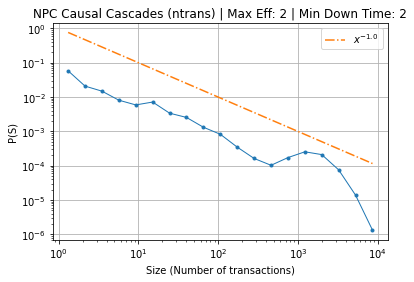

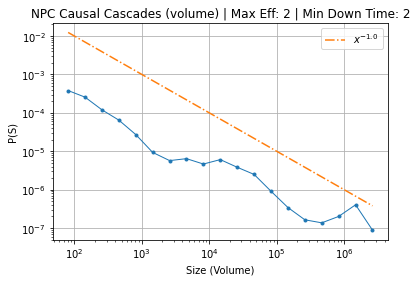

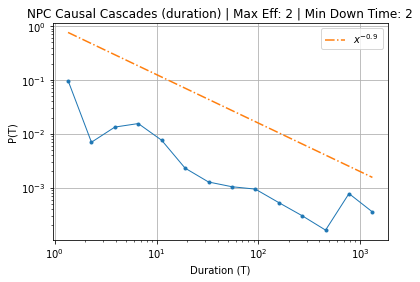

In [9]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*1, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9), '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

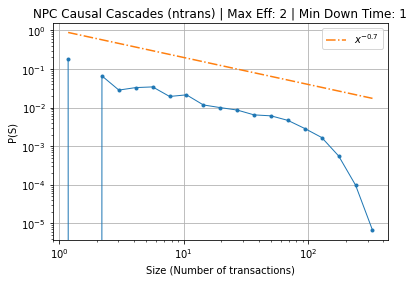

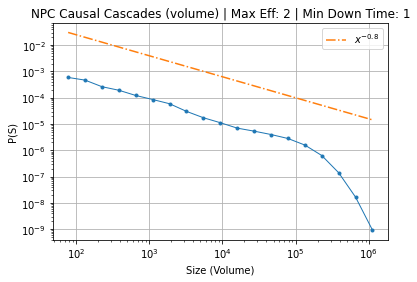

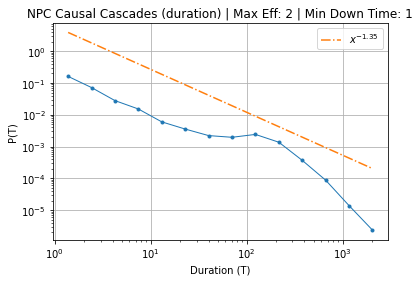

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

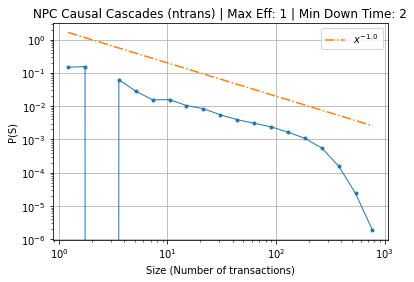

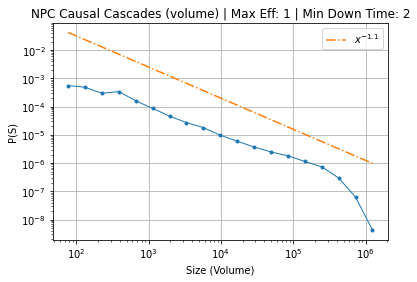

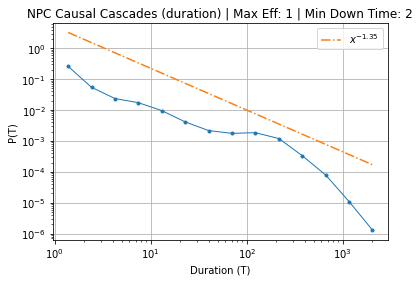

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

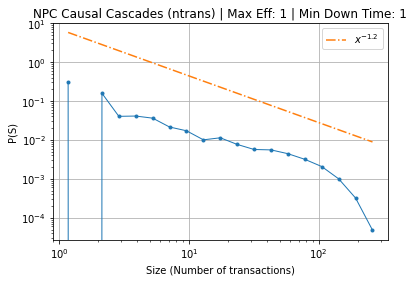

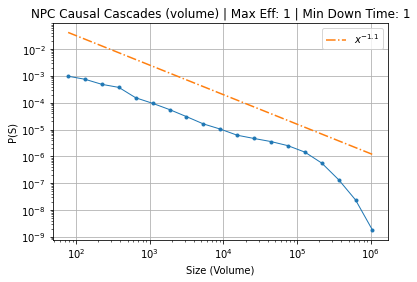

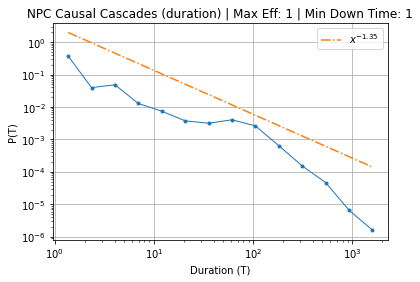

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
